In [134]:
#getting and working with data
import pandas as pd
import numpy as np
import scipy as sp
import re
import os

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':35,
                              'axes.titlesize':50,
                              'axes.labelsize':35})

pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [80]:
#read in task dfs and combine

path = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1'
all_data = pd.DataFrame() 

file_names = os.listdir(path)
print(len(file_names))

file_paths = []

for file in file_names:
    
    file_path = path + '/' + file
    file_paths.append(file_path)

print(len(file_paths))

for path in file_paths:
    print(path)
    df_int = pd.read_csv(path)
    df_int = pd.DataFrame(data = df_int)
    print(df_int.shape)
    
    all_data = pd.concat([all_data, df_int], axis=0)
    print(all_data.shape)

#rearrange columns
all_data = all_data[['date', 'stage', 'type', 'session', 'session_num', 'cage', 'animal_number',
       'group', 'active_lever', 'trial_num', 'trial_bin',
       'trial_duration', 'lever_ratio', 'reinforcement_count',
       'reinforcement_latency_1st', 'HE_count', 'HE_latency_1st',
       'HE_latency_ave', 'active_lever_count', 'active_lever_latency_1st',
       'inactive_lever_count', 'inactive_lever_latency_1st',
       'active_lever_latency_ave', 'inactive_lever_latency_ave',
       'reinforcement_latency_ave']]

#update group names
all_data['group'].replace({1: 'sham', 2: 'blast'}, inplace=True)
all_data.head()

7
7
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/extinction_learn.csv
(9372, 25)
(9372, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/lever_disc_learn.csv
(13950, 25)
(23322, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/post_PR_retrain.csv
(8881, 25)
(32203, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/PR_test.csv
(1148, 25)
(33351, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/PR_train.csv
(4455, 25)
(37806, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/reinst_cue.csv
(1250, 25)
(39056, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/reversal_learn.csv
(12148, 25)
(51204, 25)


,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200316,extinction_learn,session,EXT,1,158,825,sham,0,0,0,3.68,1.00,0,NaN,0,NaN,NaN,1,3.67,0,NaN,3.67,NaN,NaN
1,200316,extinction_learn,session,EXT,1,158,825,sham,0,1,0,7.02,0.50,0,NaN,0,NaN,NaN,1,7.01,1,3.73,7.01,3.730000,NaN
2,200316,extinction_learn,session,EXT,1,158,825,sham,0,2,0,4.43,1.00,0,NaN,0,NaN,NaN,1,4.42,0,NaN,4.42,NaN,NaN
3,200316,extinction_learn,session,EXT,1,158,825,sham,0,3,0,21.94,0.25,0,NaN,0,NaN,NaN,1,21.93,3,17.13,21.93,18.313333,NaN
4,200316,extinction_learn,session,EXT,1,158,825,sham,0,4,0,28.47,0.50,0,NaN,0,NaN,NaN,1,28.46,1,2.62,28.46,2.620000,NaN


In [51]:
all_data.groupby(['stage', 'session'])['session_num'].value_counts()

stage             session  session_num
PR_test           PR1      1               563
                  PR13     1               585
PR_train          FR3      1              2919
                  FR33     1              1536
extinction_learn  EXT      1              2480
                           2              1838
                           3              1509
                           4              1232
                           5              1182
                           6              1131
lever_disc_learn  FR1      4              2944
                           5              2892
                           6              2884
                           3              2544
                           2              1942
                           1               744
post_PR_retrain   FR1      7              3008
                           8              3004
                           9              2869
reinst_cue        RCP      1              1250
reversal_learn    RLF

### Lever press aquisition

In [99]:
data = all_data[all_data['stage'] == 'lever_disc_learn']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.tail(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
13949,200224,lever_disc_learn,ITI,FR1,6,163,842,blast,0,92,5,29.99,NaN,1,0.0,1,0.77,0.77,0,NaN,0,NaN,NaN,NaN,0.0


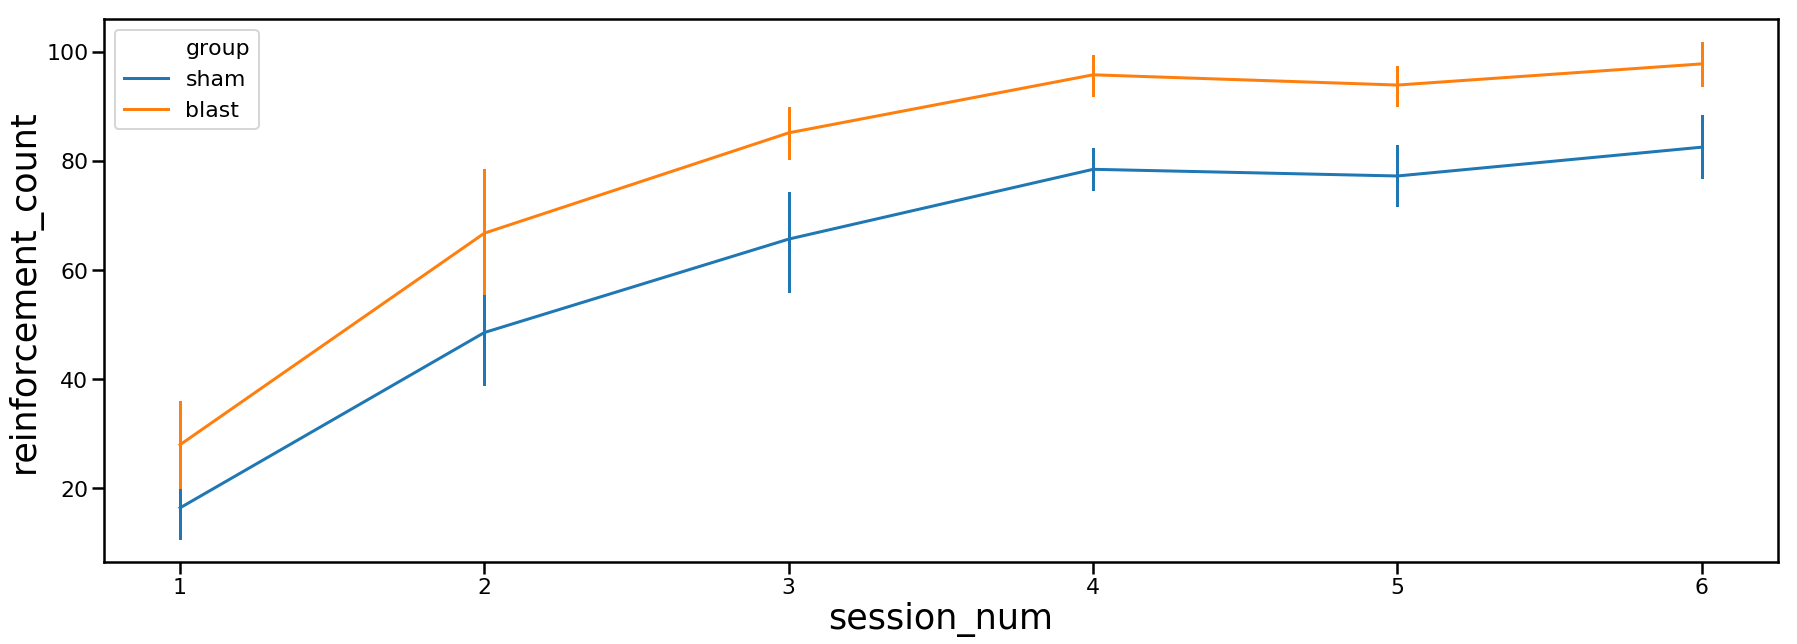

In [126]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='reinforcement_count', data=data_session.groupby(['session_num', 'animal_number', 'group'])['reinforcement_count'].sum().reset_index(), hue='group', err_style='bars', ci=68)

plt.show()

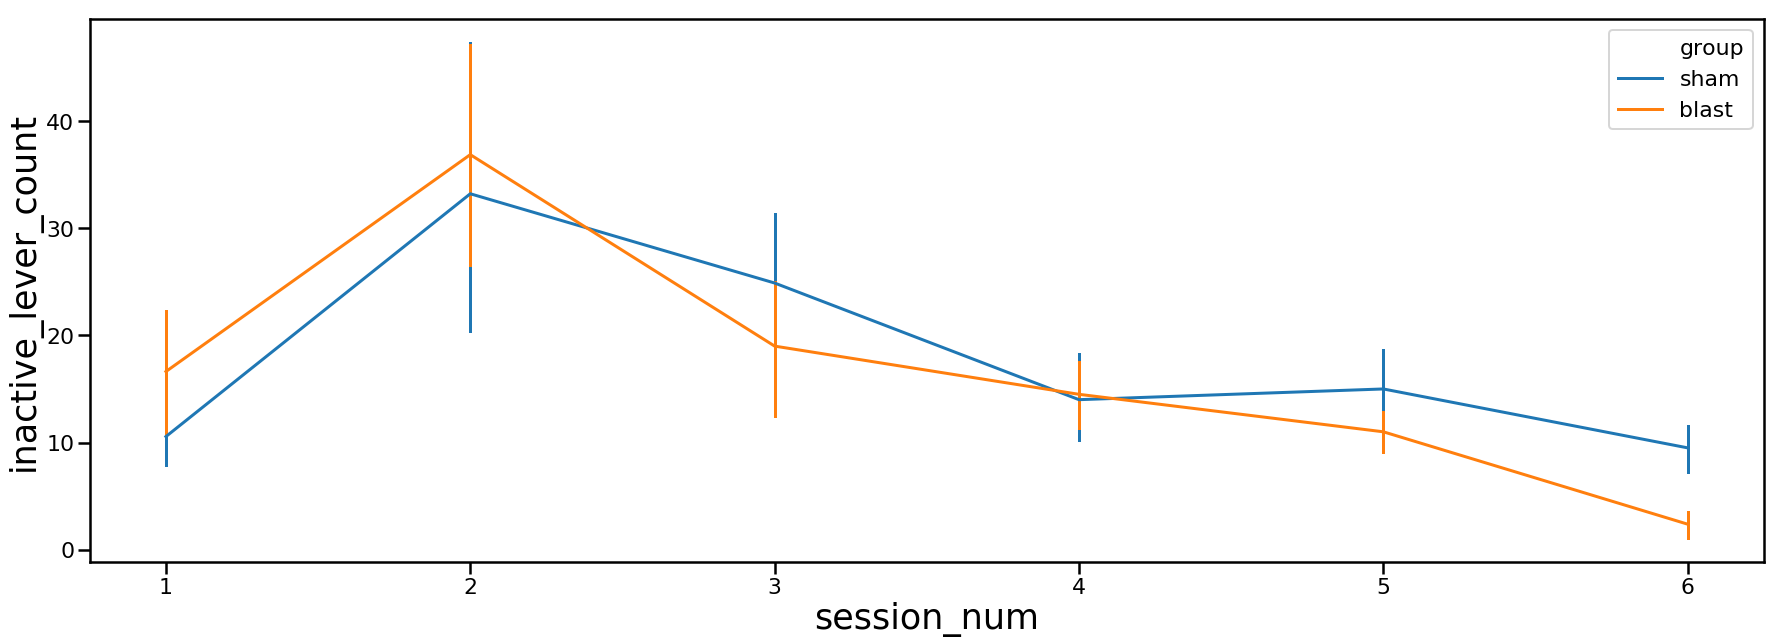

In [104]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='inactive_lever_count', data=data_session.groupby(['session_num', 'animal_number', 'group'])['inactive_lever_count'].sum().reset_index(), hue='group', err_style='bars', ci=68)

plt.show()

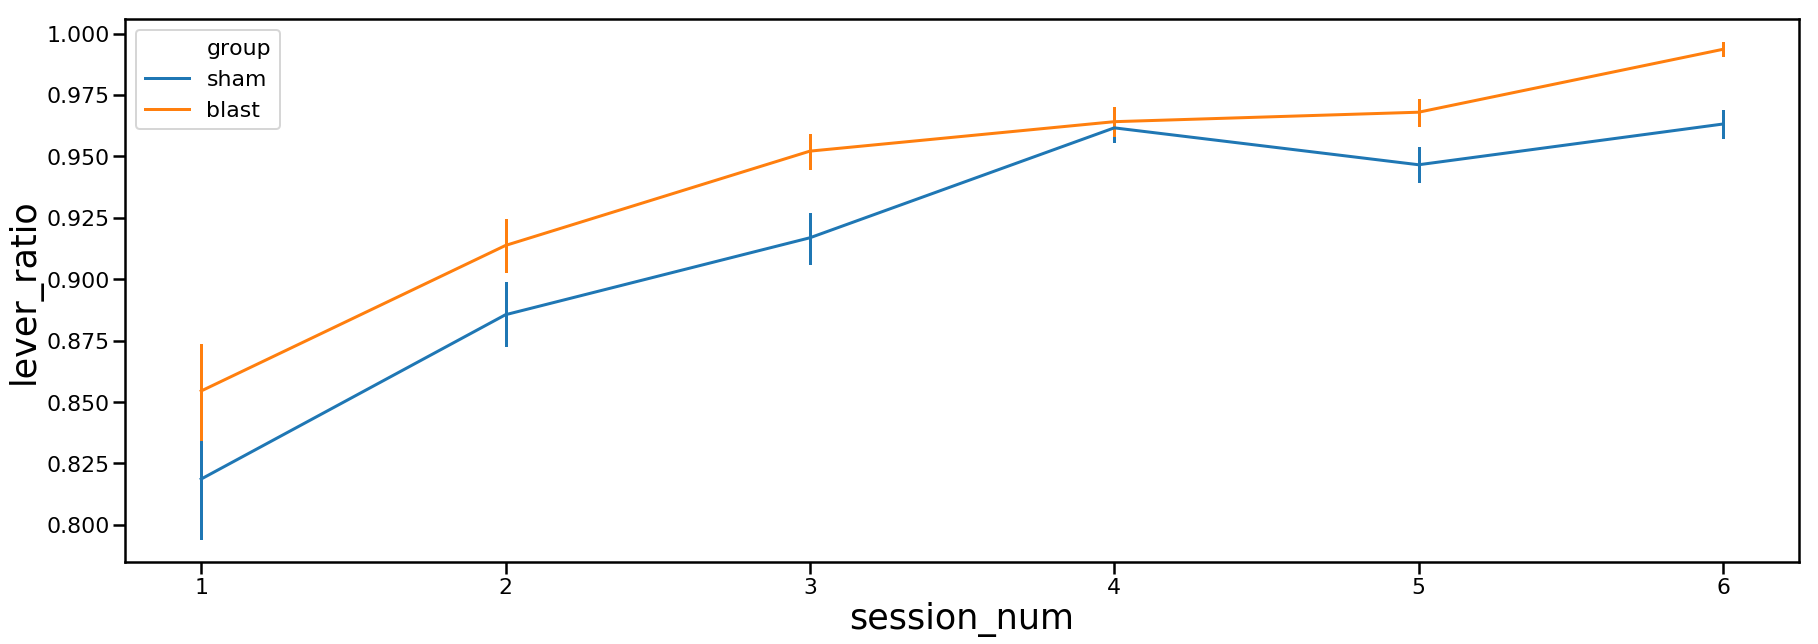

In [124]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='lever_ratio', data=data_session, hue='group', err_style='bars', ci=68)

plt.show()

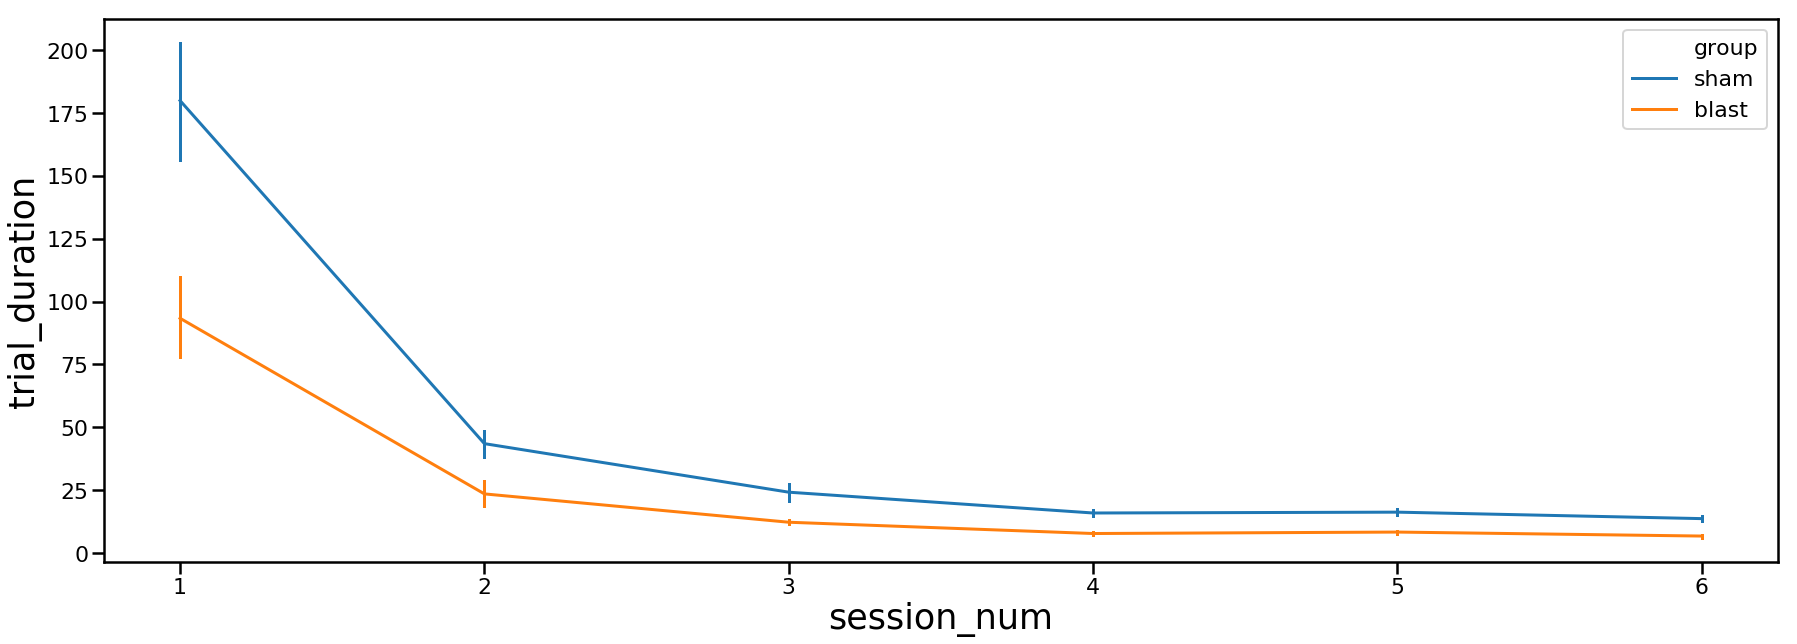

In [123]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='trial_duration', data=data_session, hue='group', err_style='bars', ci=68)

plt.show()

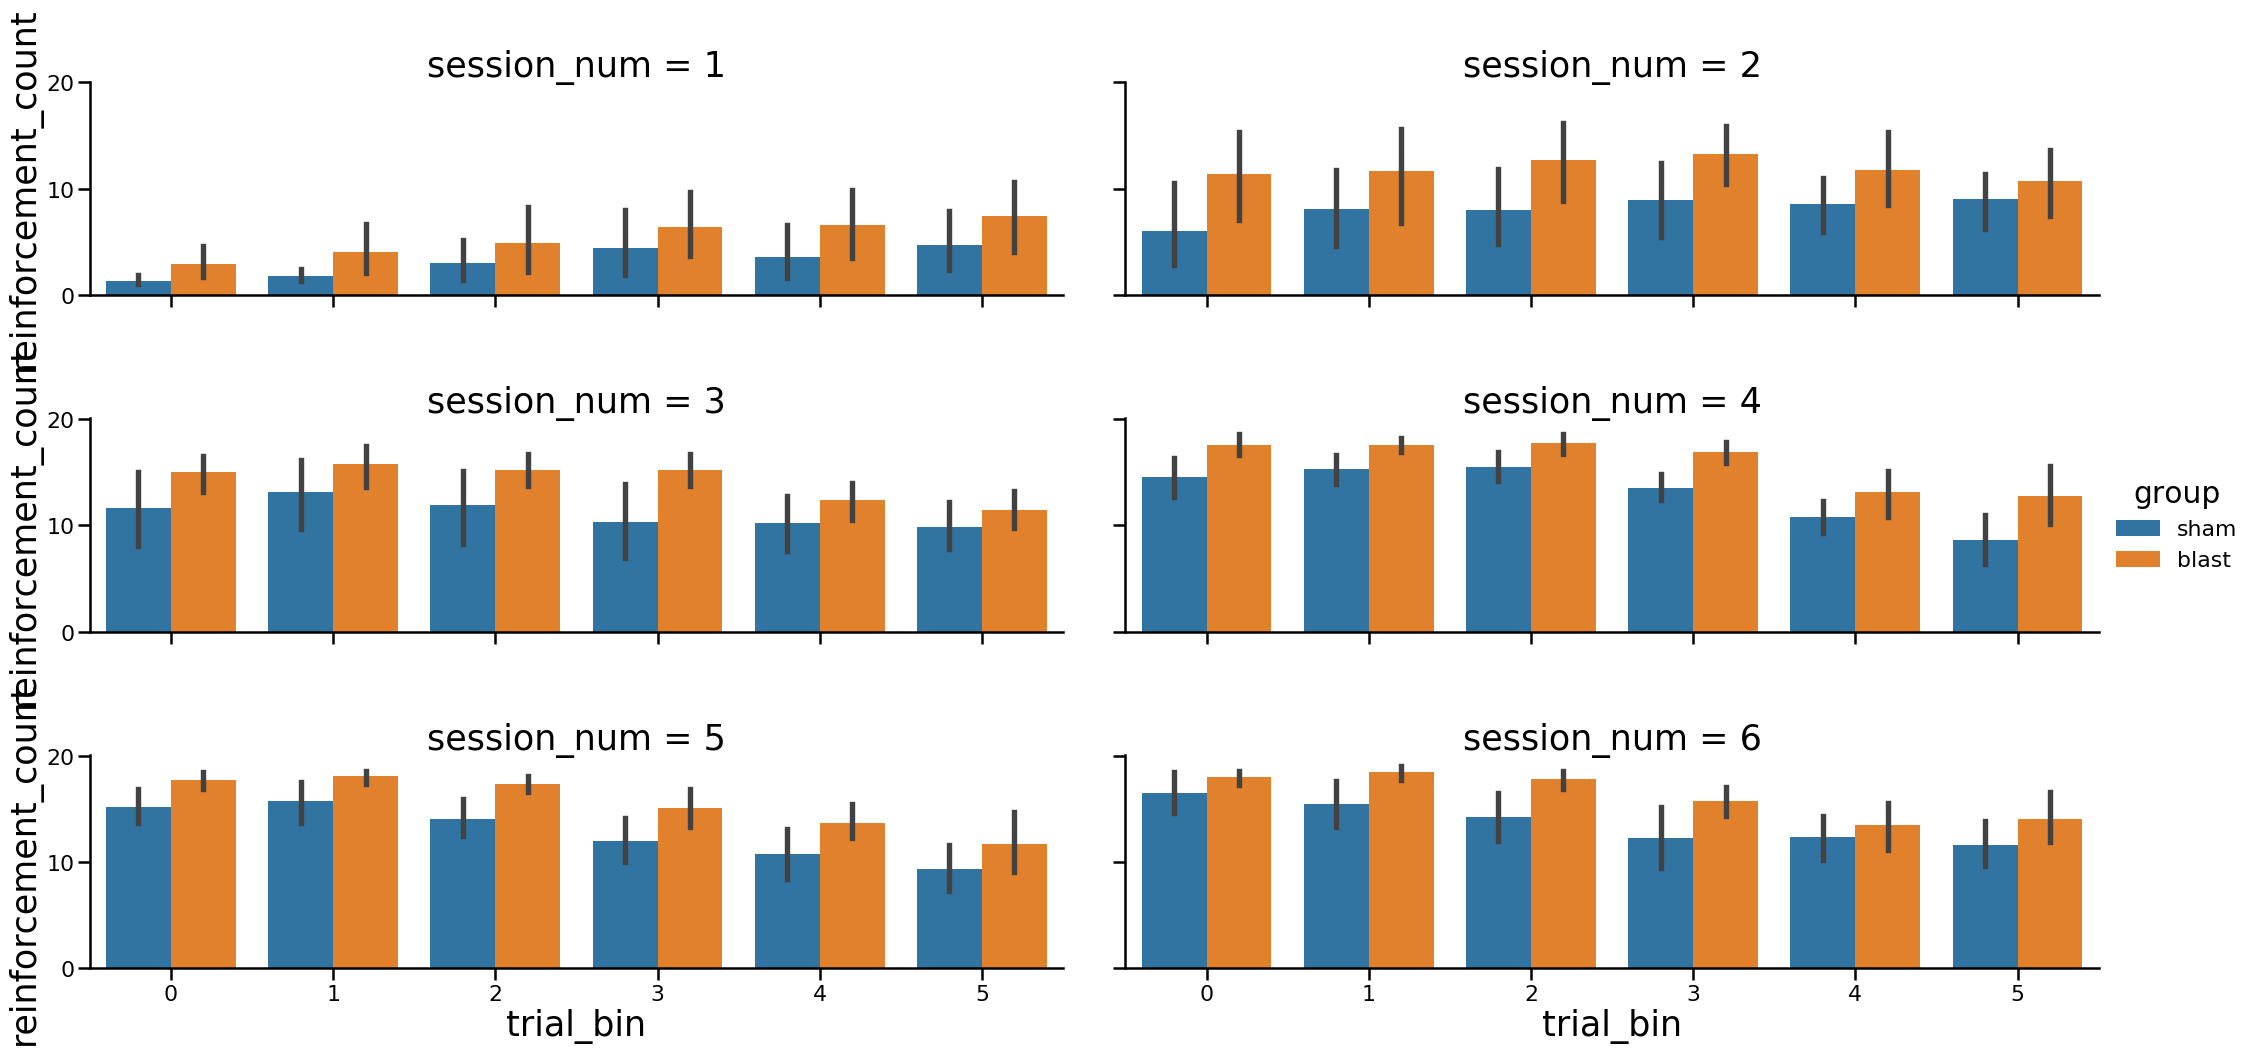

In [113]:
sns.catplot(x='trial_bin', y='reinforcement_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['reinforcement_count'].sum().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3)

plt.show()

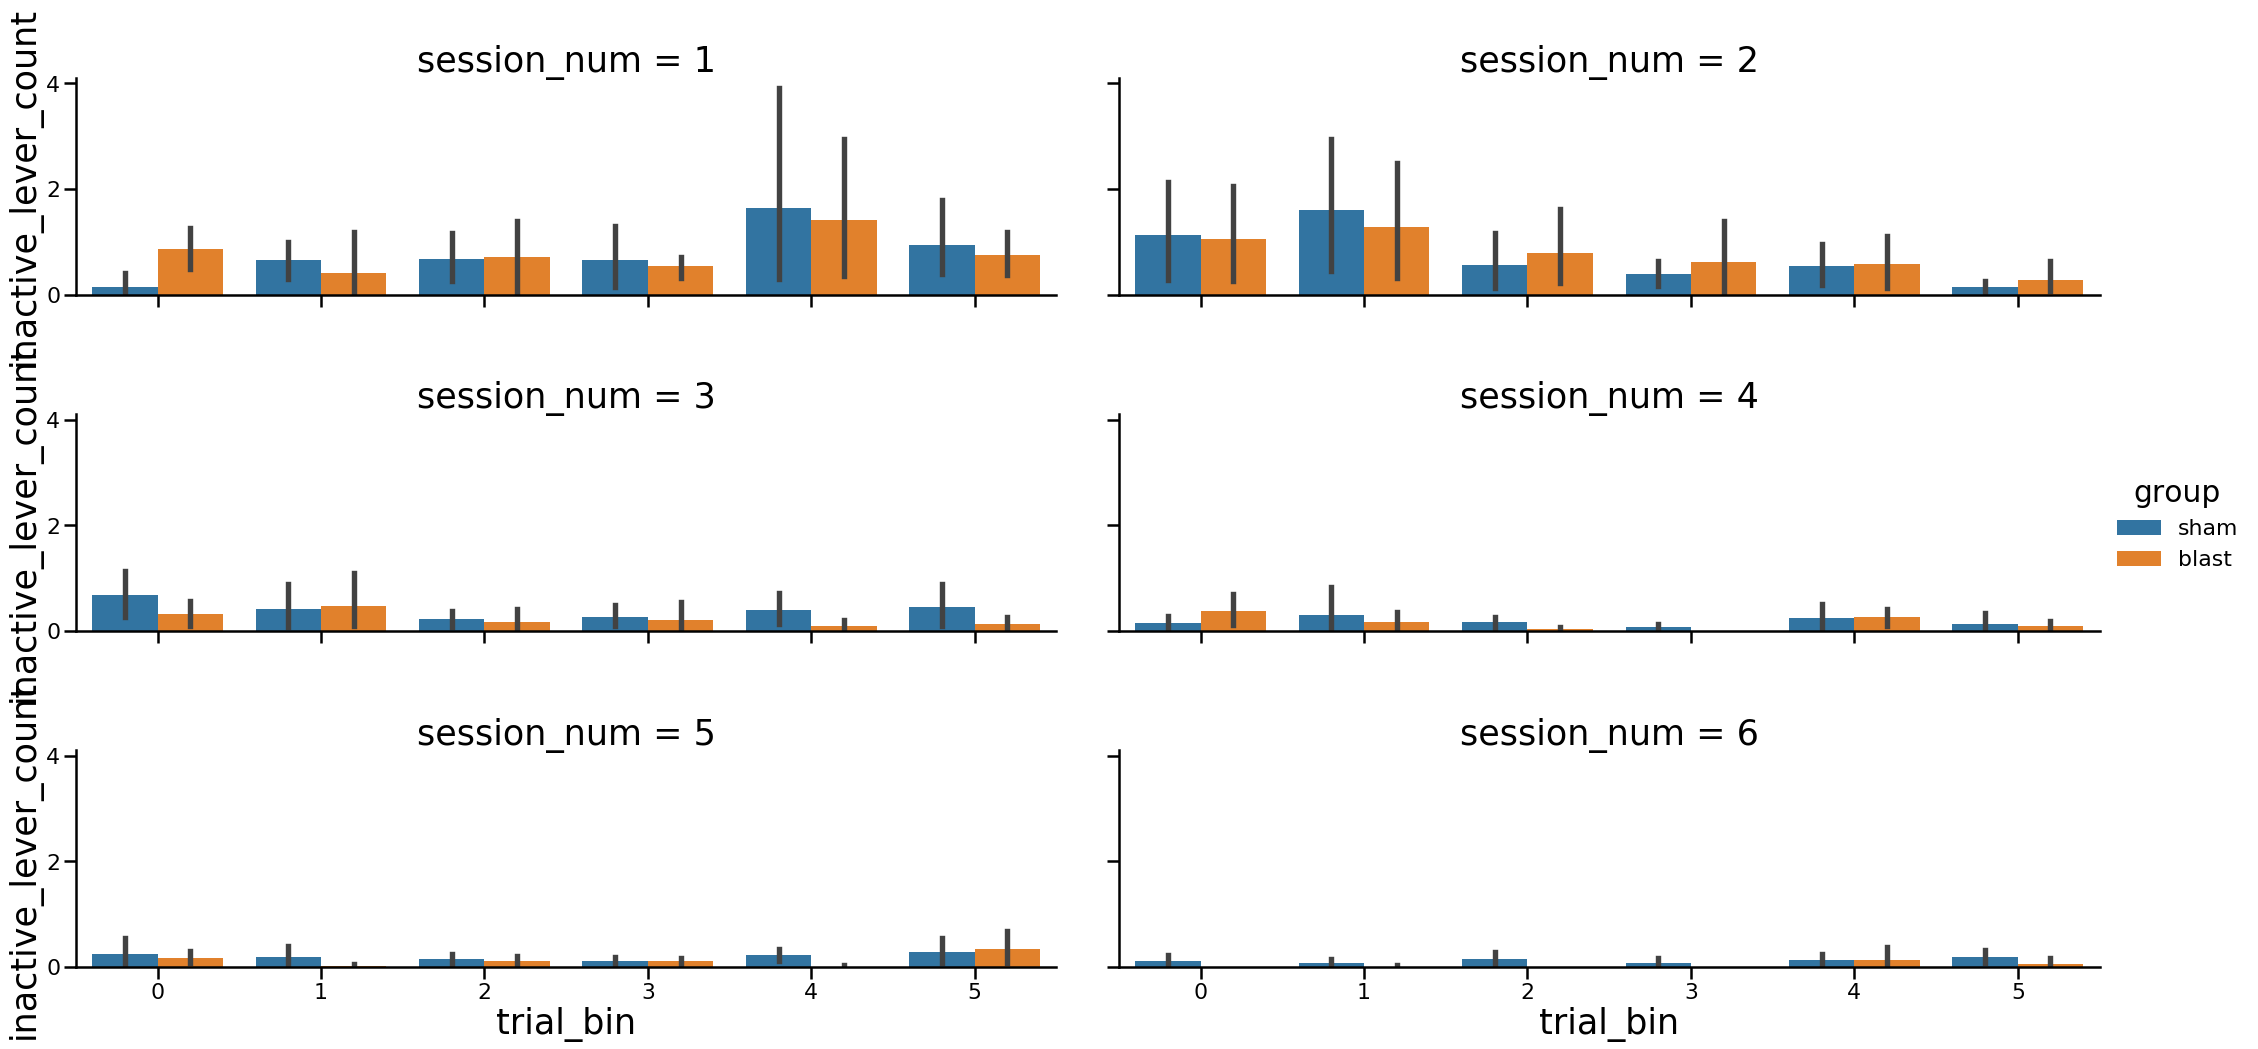

In [117]:
sns.catplot(x='trial_bin', y='inactive_lever_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['inactive_lever_count'].mean().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3,)

plt.show()

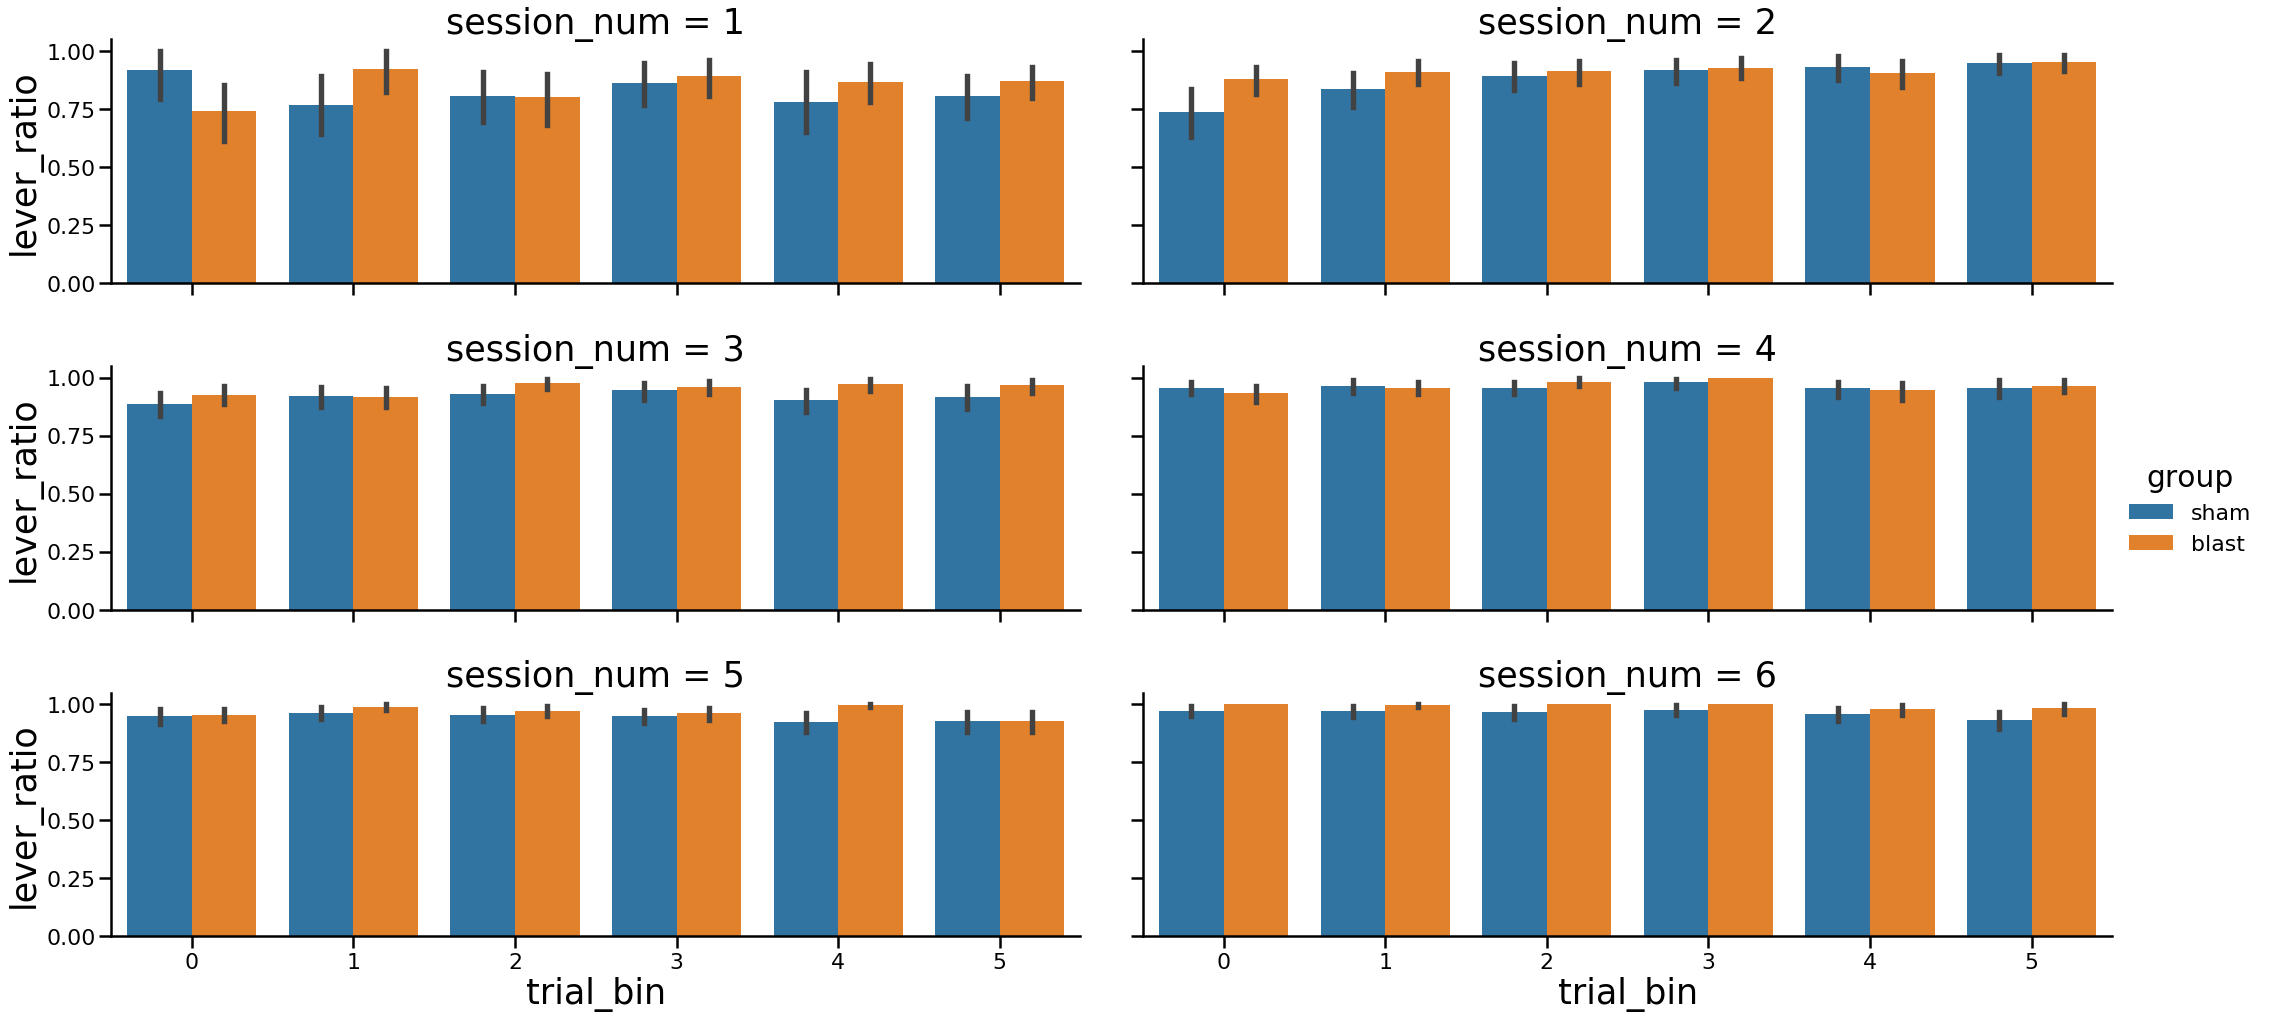

In [122]:
sns.catplot(x='trial_bin', y='lever_ratio', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3)

plt.show()

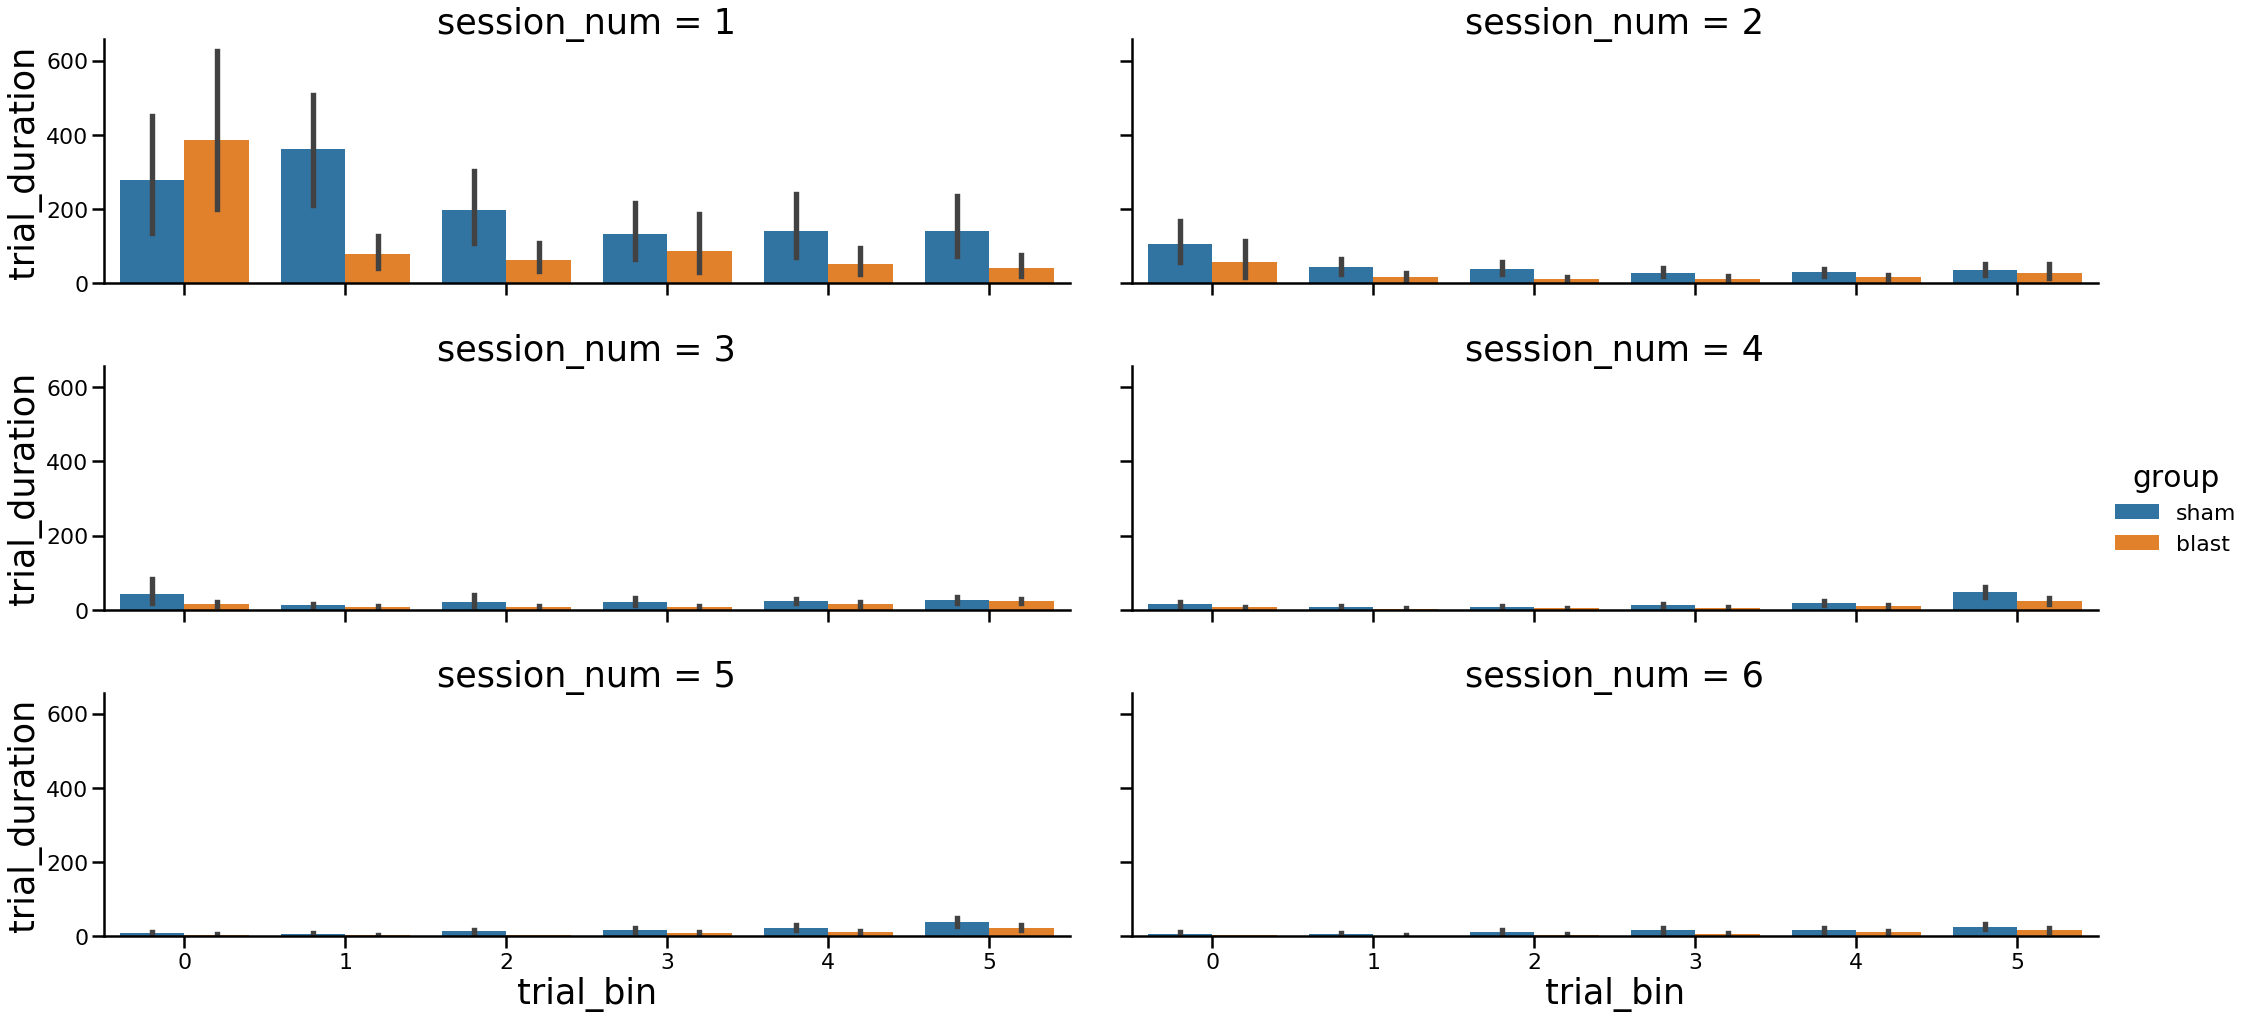

In [121]:
sns.catplot(x='trial_bin', y='trial_duration', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3)

plt.show()

### Break point

In [237]:
data = all_data[all_data['stage'] == 'PR_test']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200228,PR_test,session,PR13,1,158,825,sham,0,0,0,8.06,1.0,1,8.06,0,NaN,NaN,1,8.05,0,NaN,8.05,NaN,8.06


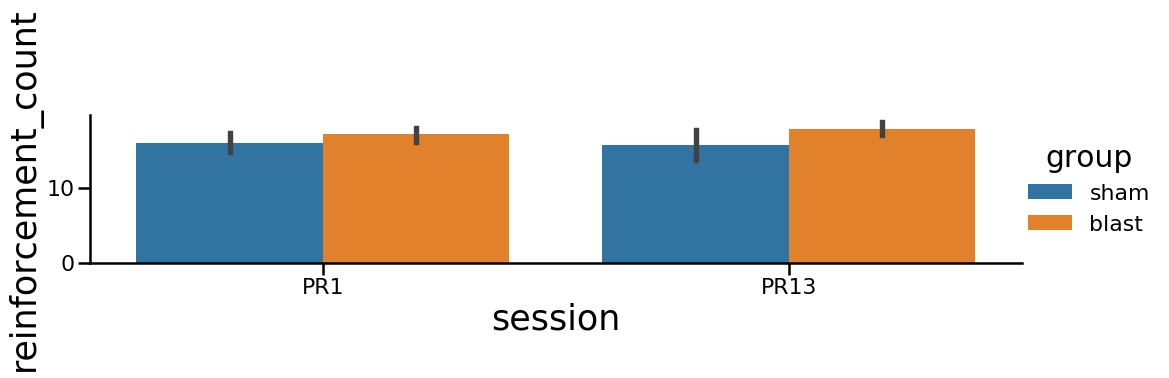

In [161]:
sns.catplot(x='session', y='reinforcement_count', data=data_session.groupby(['session', 'animal_number', 'group'])['reinforcement_count'].sum().reset_index(), hue='group', kind='bar', height=5, aspect=3)

plt.show()

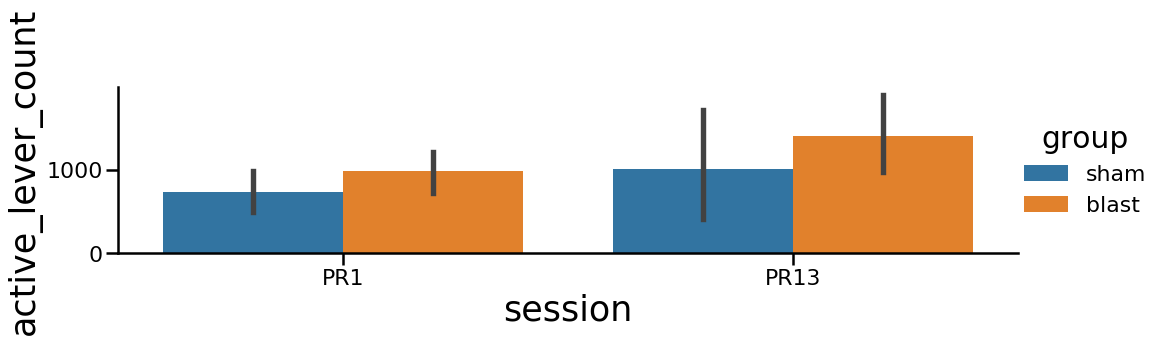

In [163]:
sns.catplot(x='session', y='active_lever_count', data=data_session.groupby(['session', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', kind='bar', height=5, aspect=3)

plt.show()

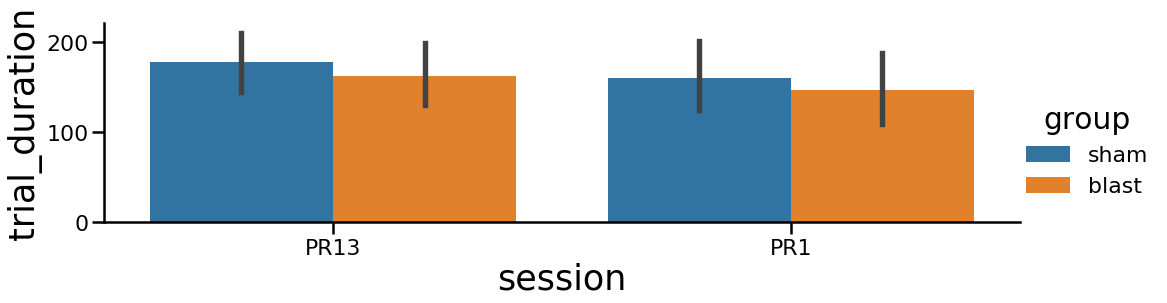

In [165]:
sns.catplot(x='session', y='trial_duration', data=data_session, hue='group', kind='bar', height=5, aspect=3)

plt.show()

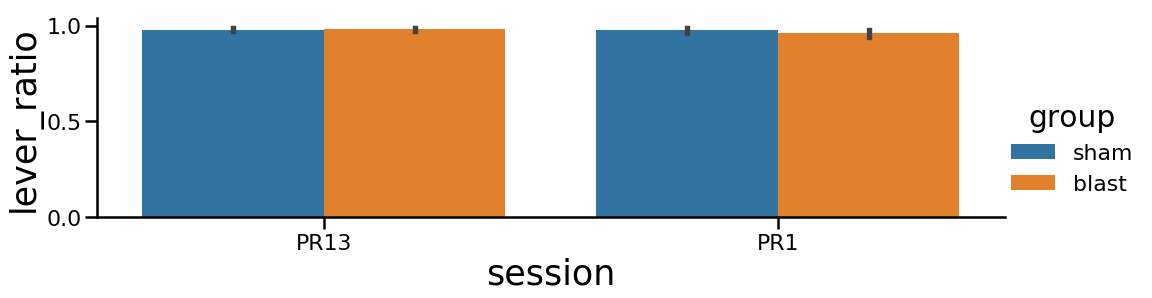

In [164]:
sns.catplot(x='session', y='lever_ratio', data=data_session, hue='group', kind='bar', height=5, aspect=3)

plt.show()

### Reversal learning

In [197]:
data = all_data[all_data['stage'] == 'reversal_learn']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200310,reversal_learn,session,RLFR1,1,158,825,sham,0,0,0,692.76,0.012987,1,692.76,39,5.2,383.585641,1,692.75,76,2.02,692.75,314.918026,692.76


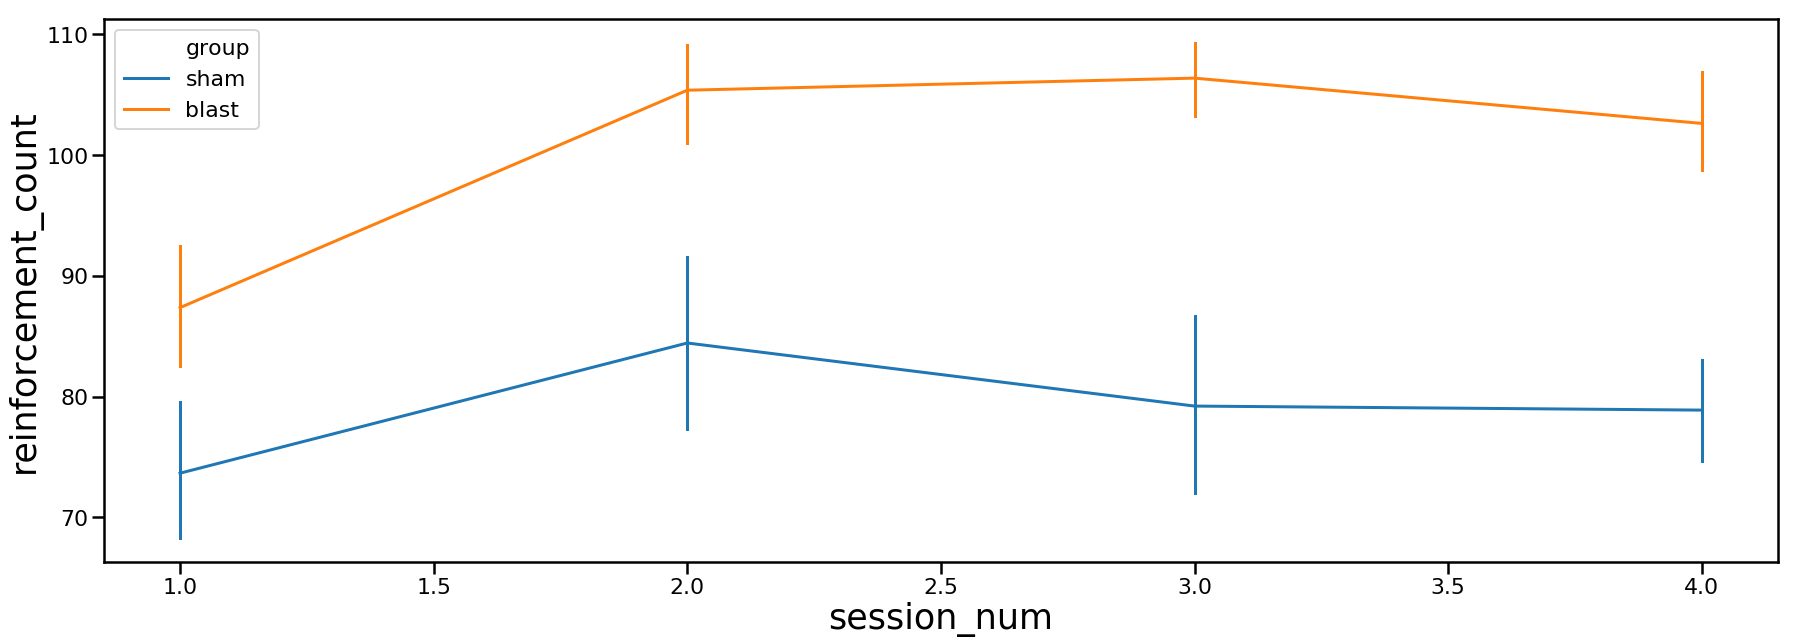

In [167]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='reinforcement_count', data=data_session.groupby(['session_num', 'animal_number', 'group'])['reinforcement_count'].sum().reset_index(), hue='group', err_style='bars', ci=68)

plt.show()

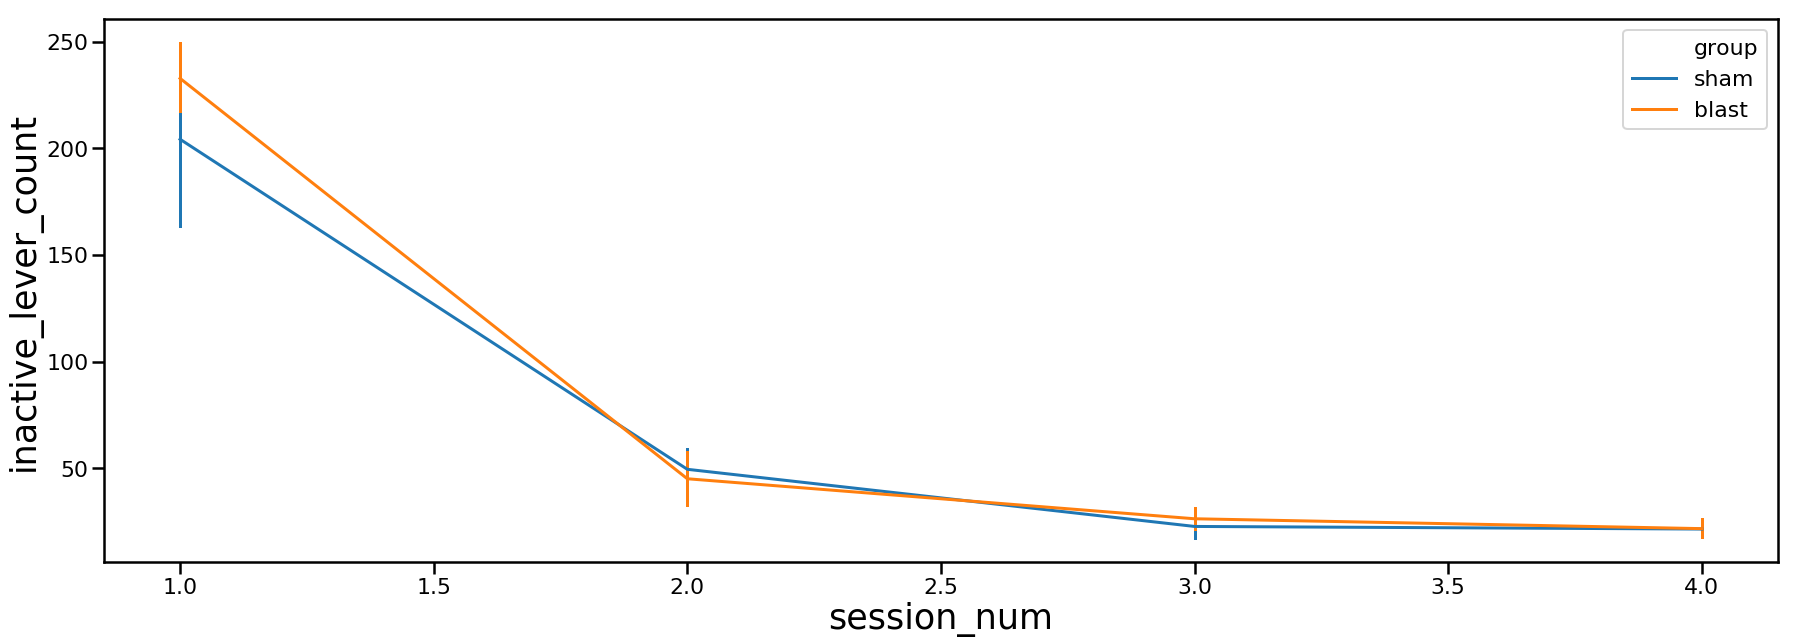

In [170]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='inactive_lever_count', data=data_session.groupby(['session_num', 'animal_number', 'group'])['inactive_lever_count'].sum().reset_index(), hue='group', err_style='bars', ci=68)

plt.show()

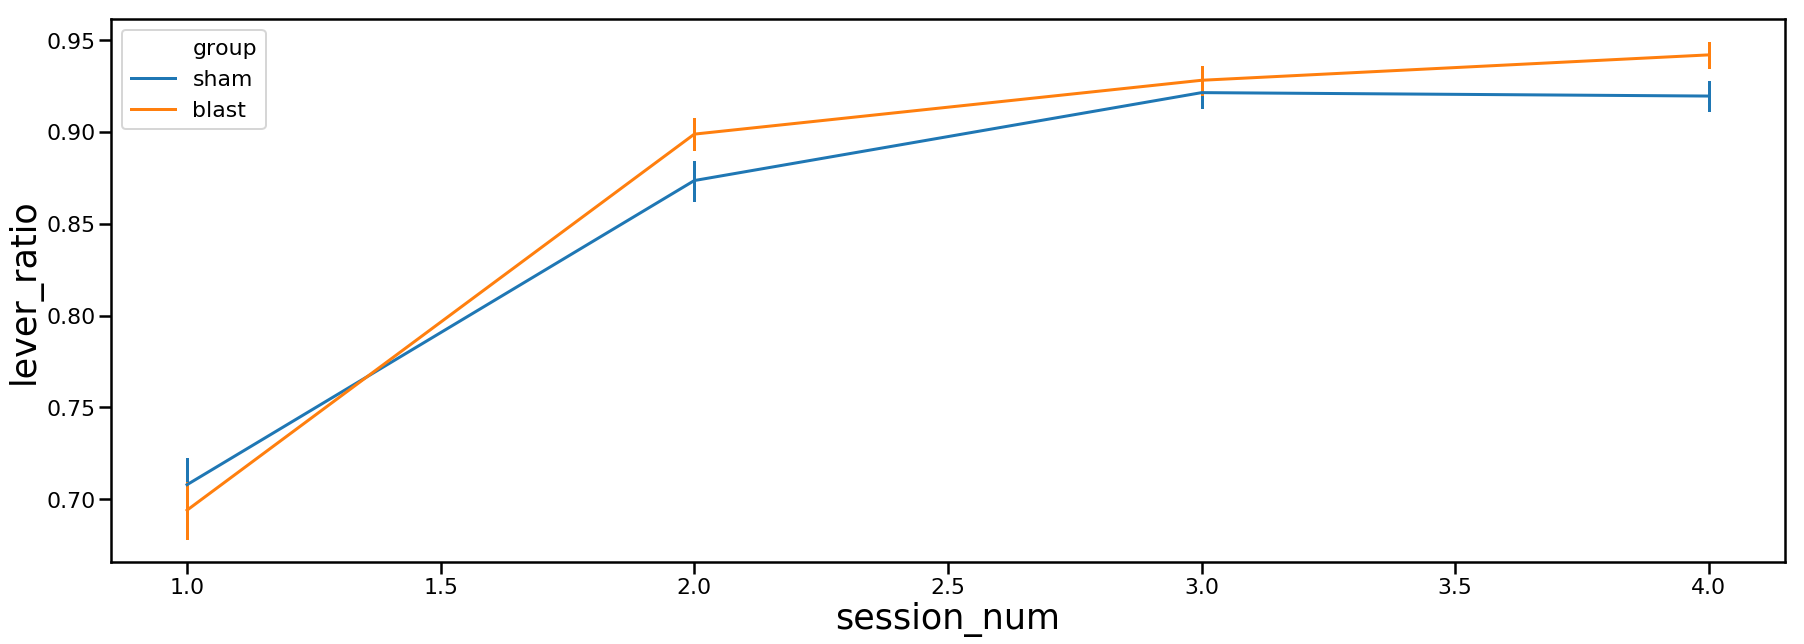

In [177]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='lever_ratio', data=data_session, hue='group', err_style='bars', ci=68)

plt.show()

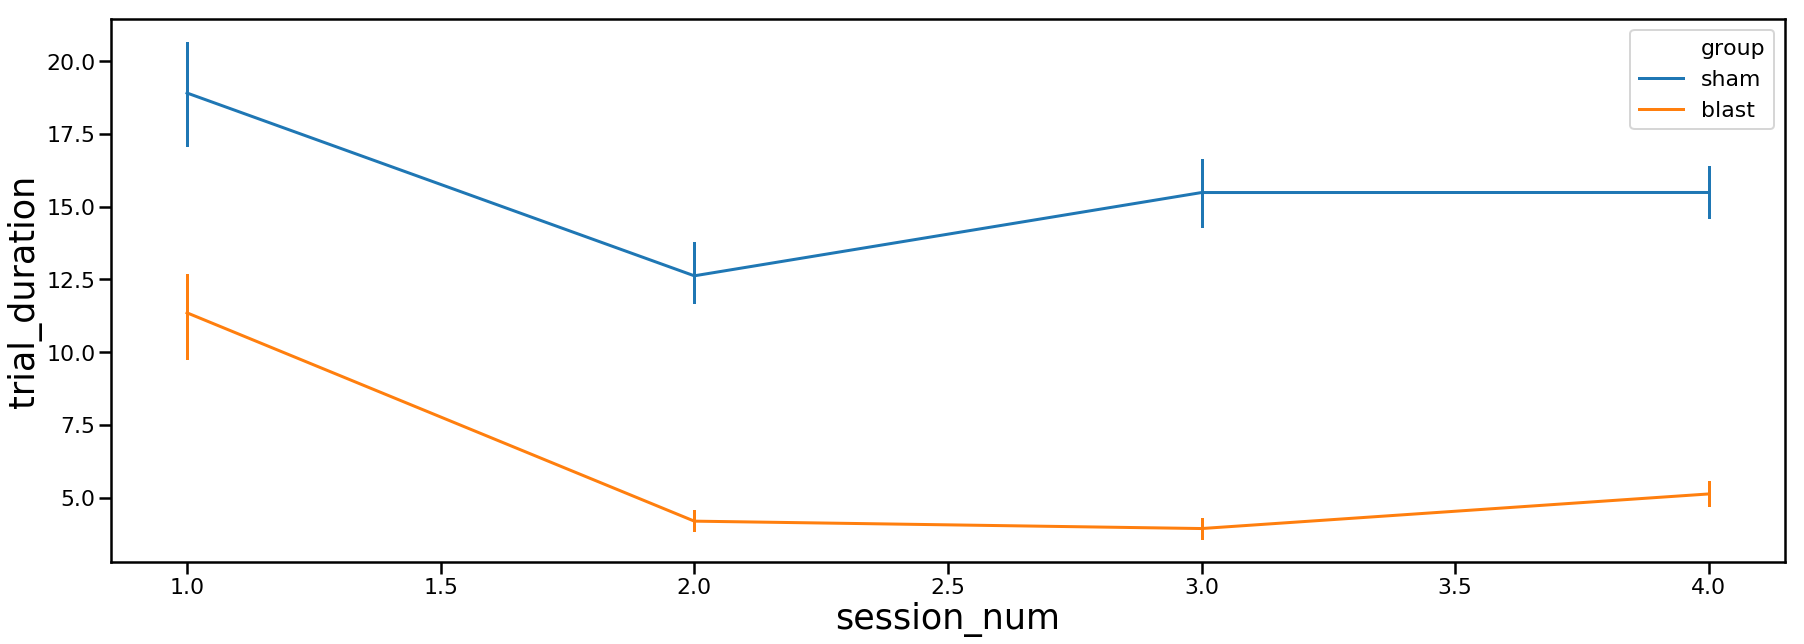

In [178]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='trial_duration', data=data_session, hue='group', err_style='bars', ci=68)

plt.show()

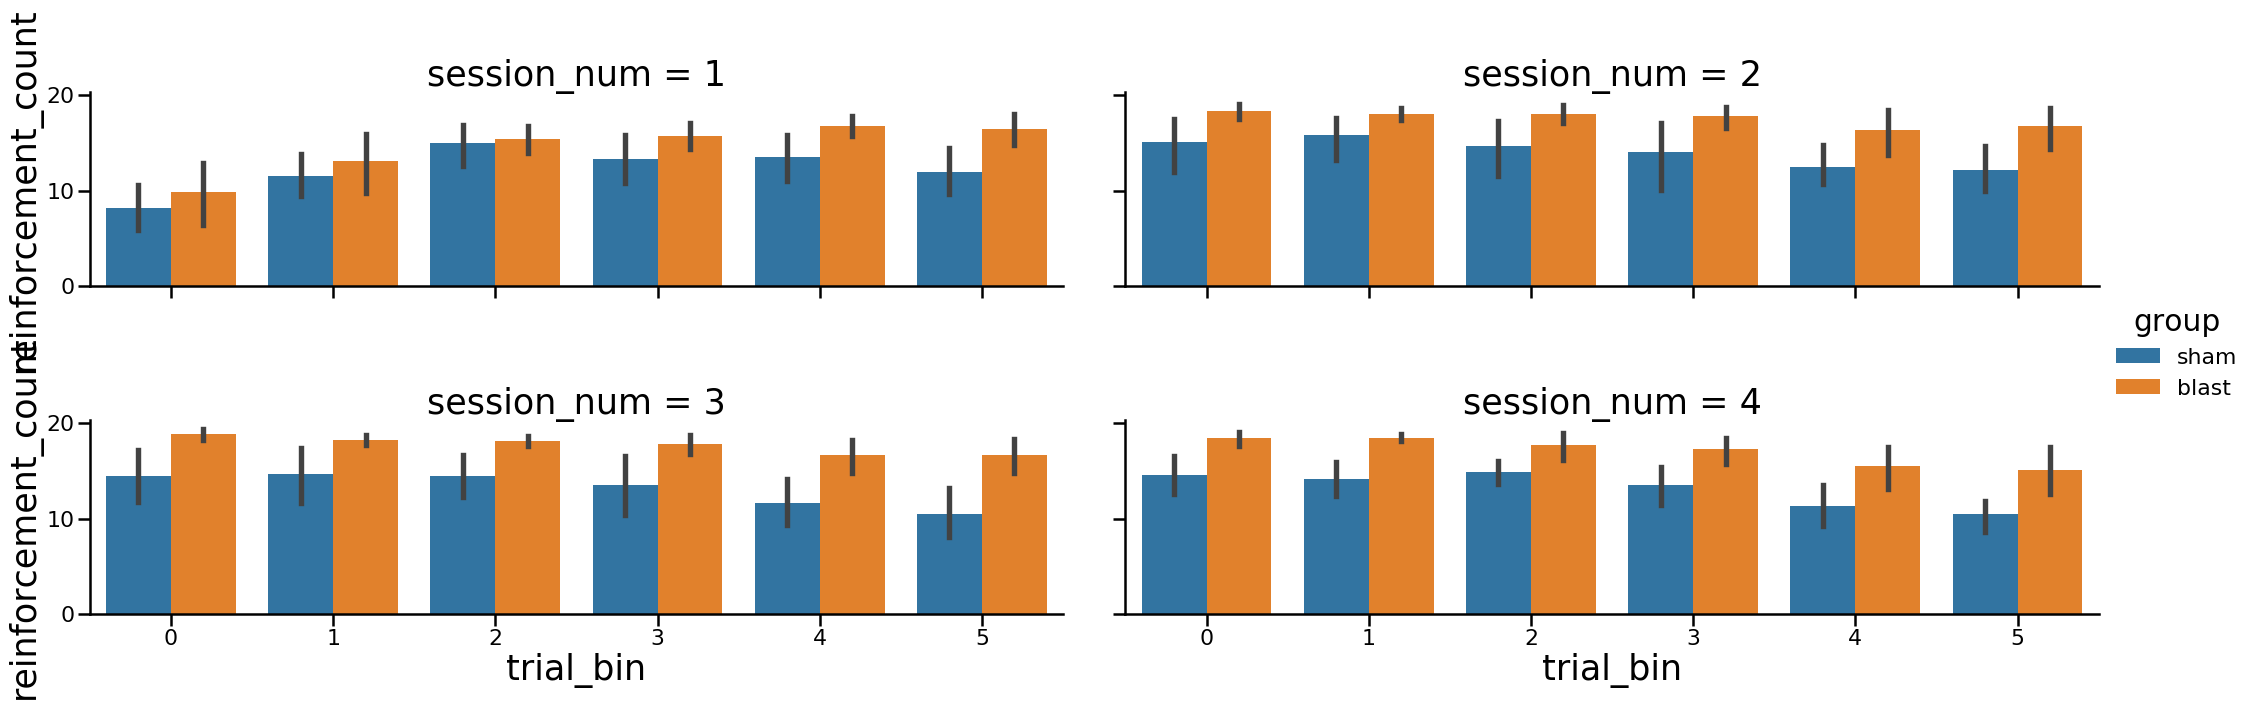

In [168]:
sns.catplot(x='trial_bin', y='reinforcement_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['reinforcement_count'].sum().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3)

plt.show()

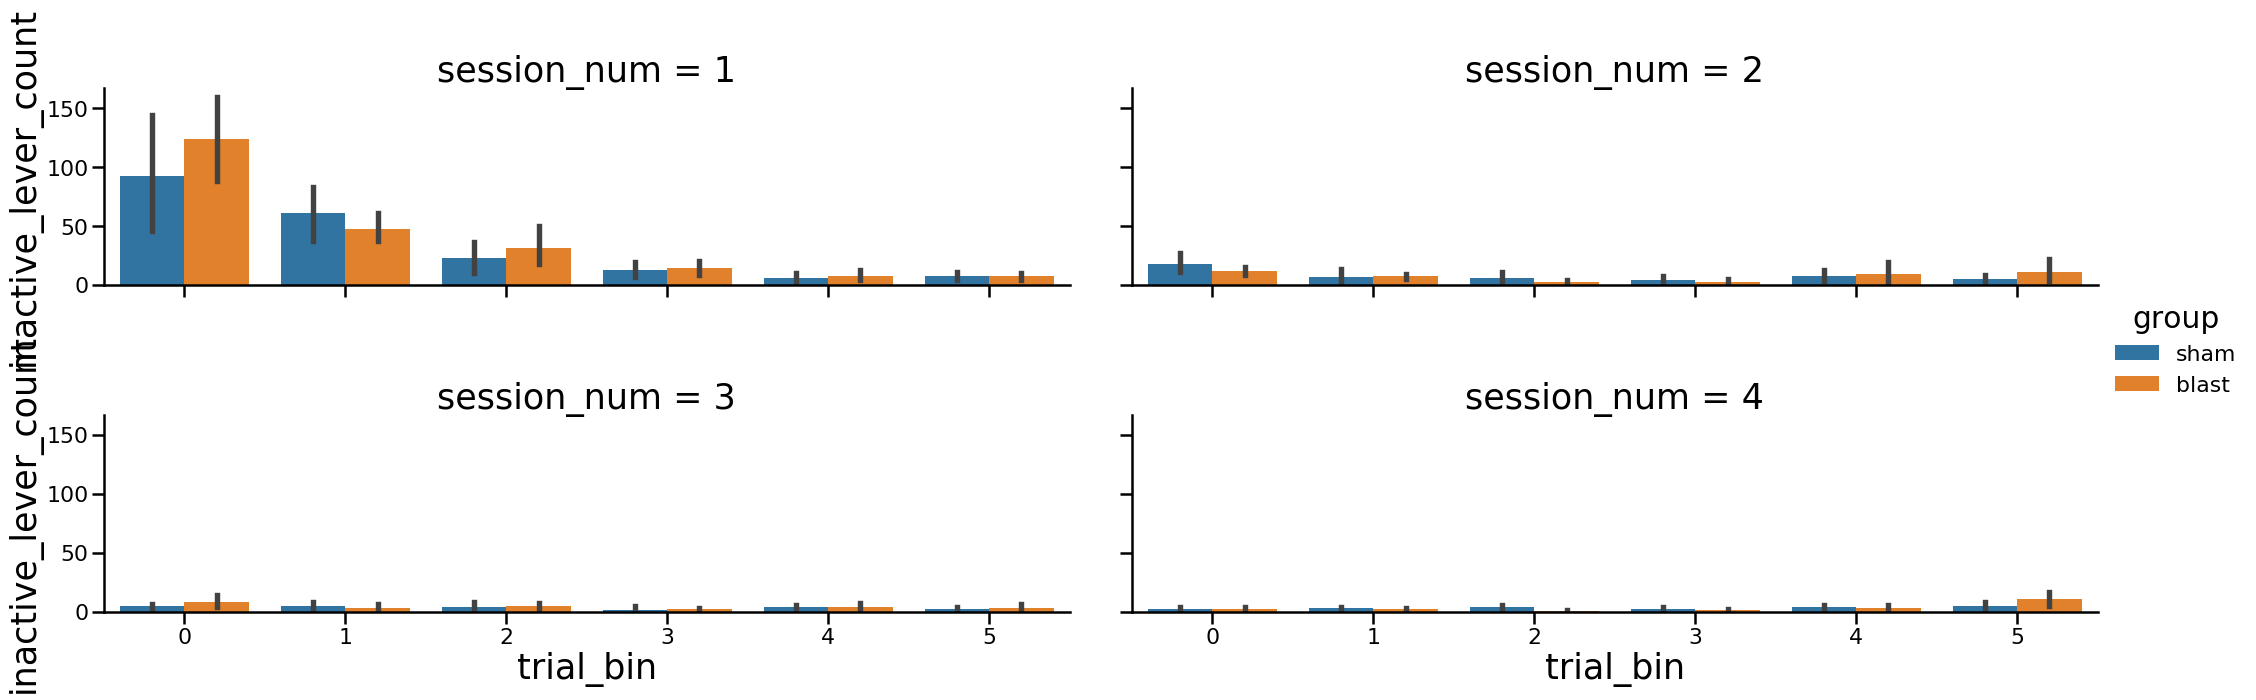

In [175]:
sns.catplot(x='trial_bin', y='inactive_lever_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['inactive_lever_count'].sum().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3)

plt.show()

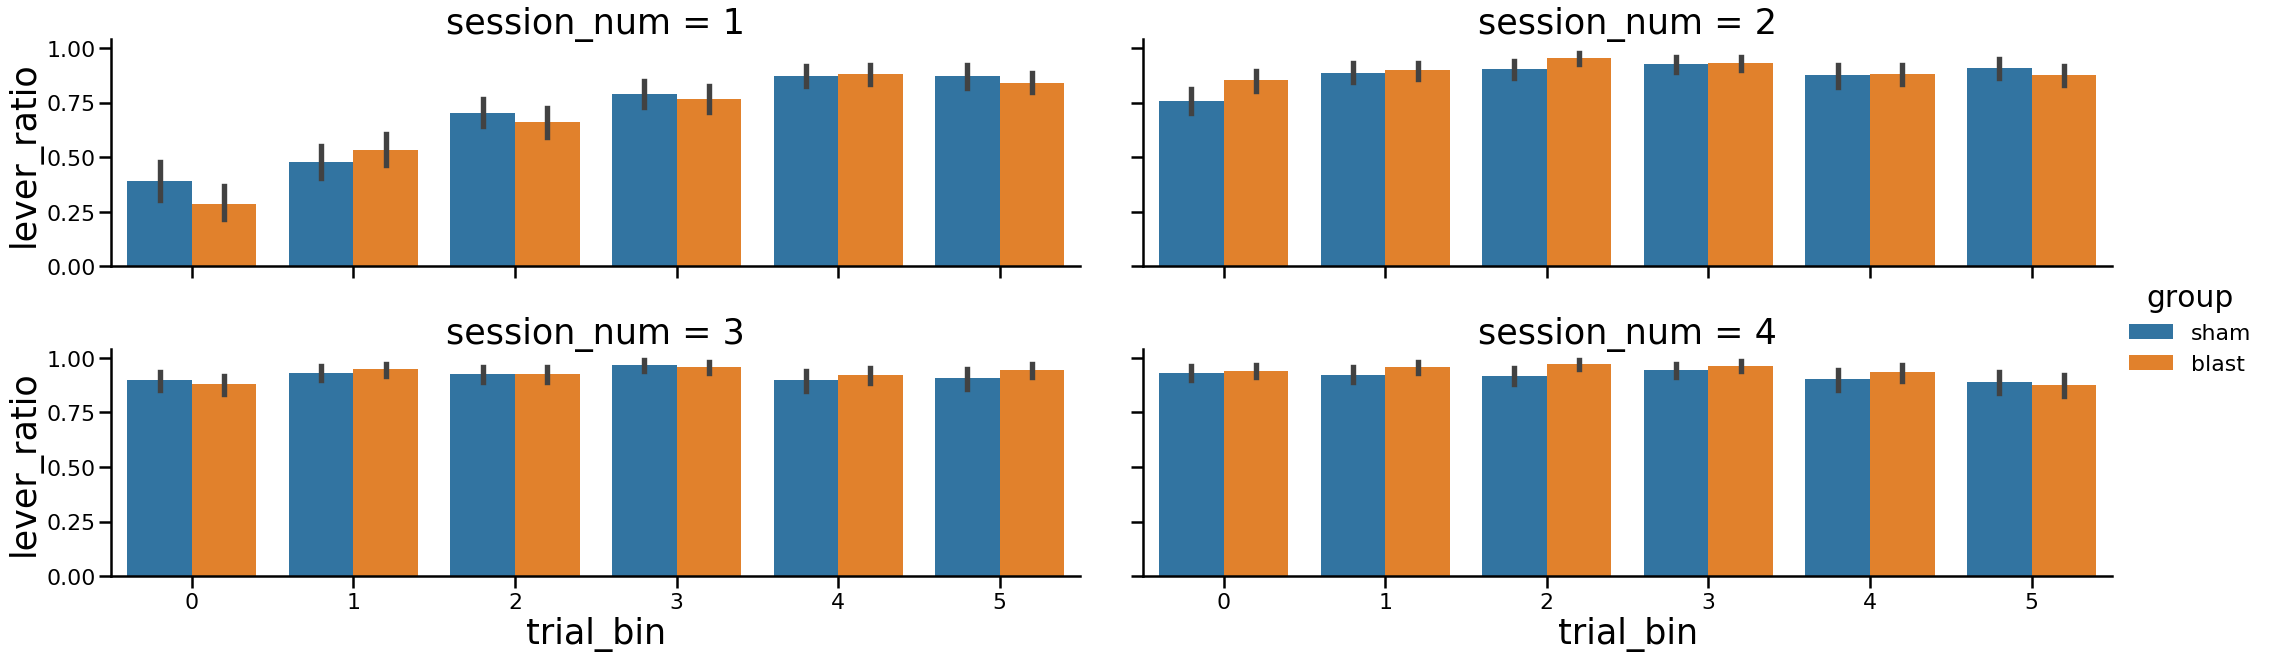

In [179]:
sns.catplot(x='trial_bin', y='lever_ratio', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3)

plt.show()

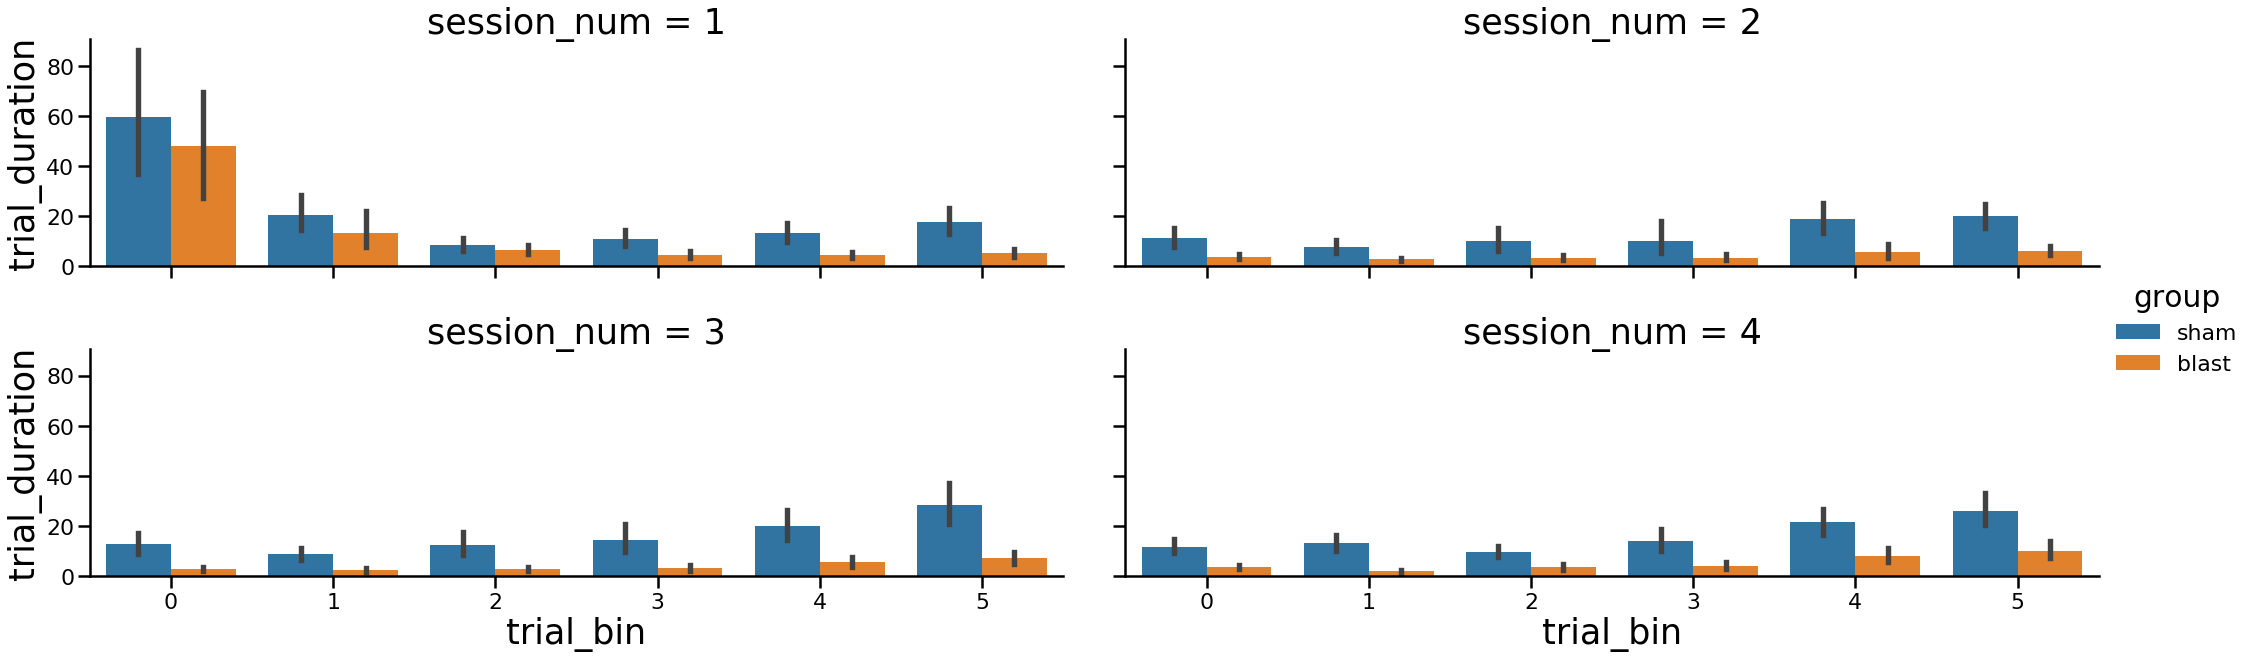

In [180]:
sns.catplot(x='trial_bin', y='trial_duration', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3)

plt.show()

In [198]:
#get info for final reversal learning session
rev_4_active = data_session[(data_session['session'] == 'RLFR1') & (data_session['session_num'] == 4)].groupby(['animal_number', 'group'])[['active_lever_count']].sum().reset_index()
rev_4_time = data_session[(data_session['session'] == 'RLFR1') & (data_session['session_num'] == 4)].groupby(['animal_number', 'group'])[['trial_duration']].mean().reset_index()

### Extinction learning

In [252]:
data = all_data[all_data['stage'] == 'extinction_learn']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200316,extinction_learn,session,EXT,1,158,825,sham,0,0,0,3.68,1.0,0,NaN,0,NaN,NaN,1,3.67,0,NaN,3.67,NaN,NaN


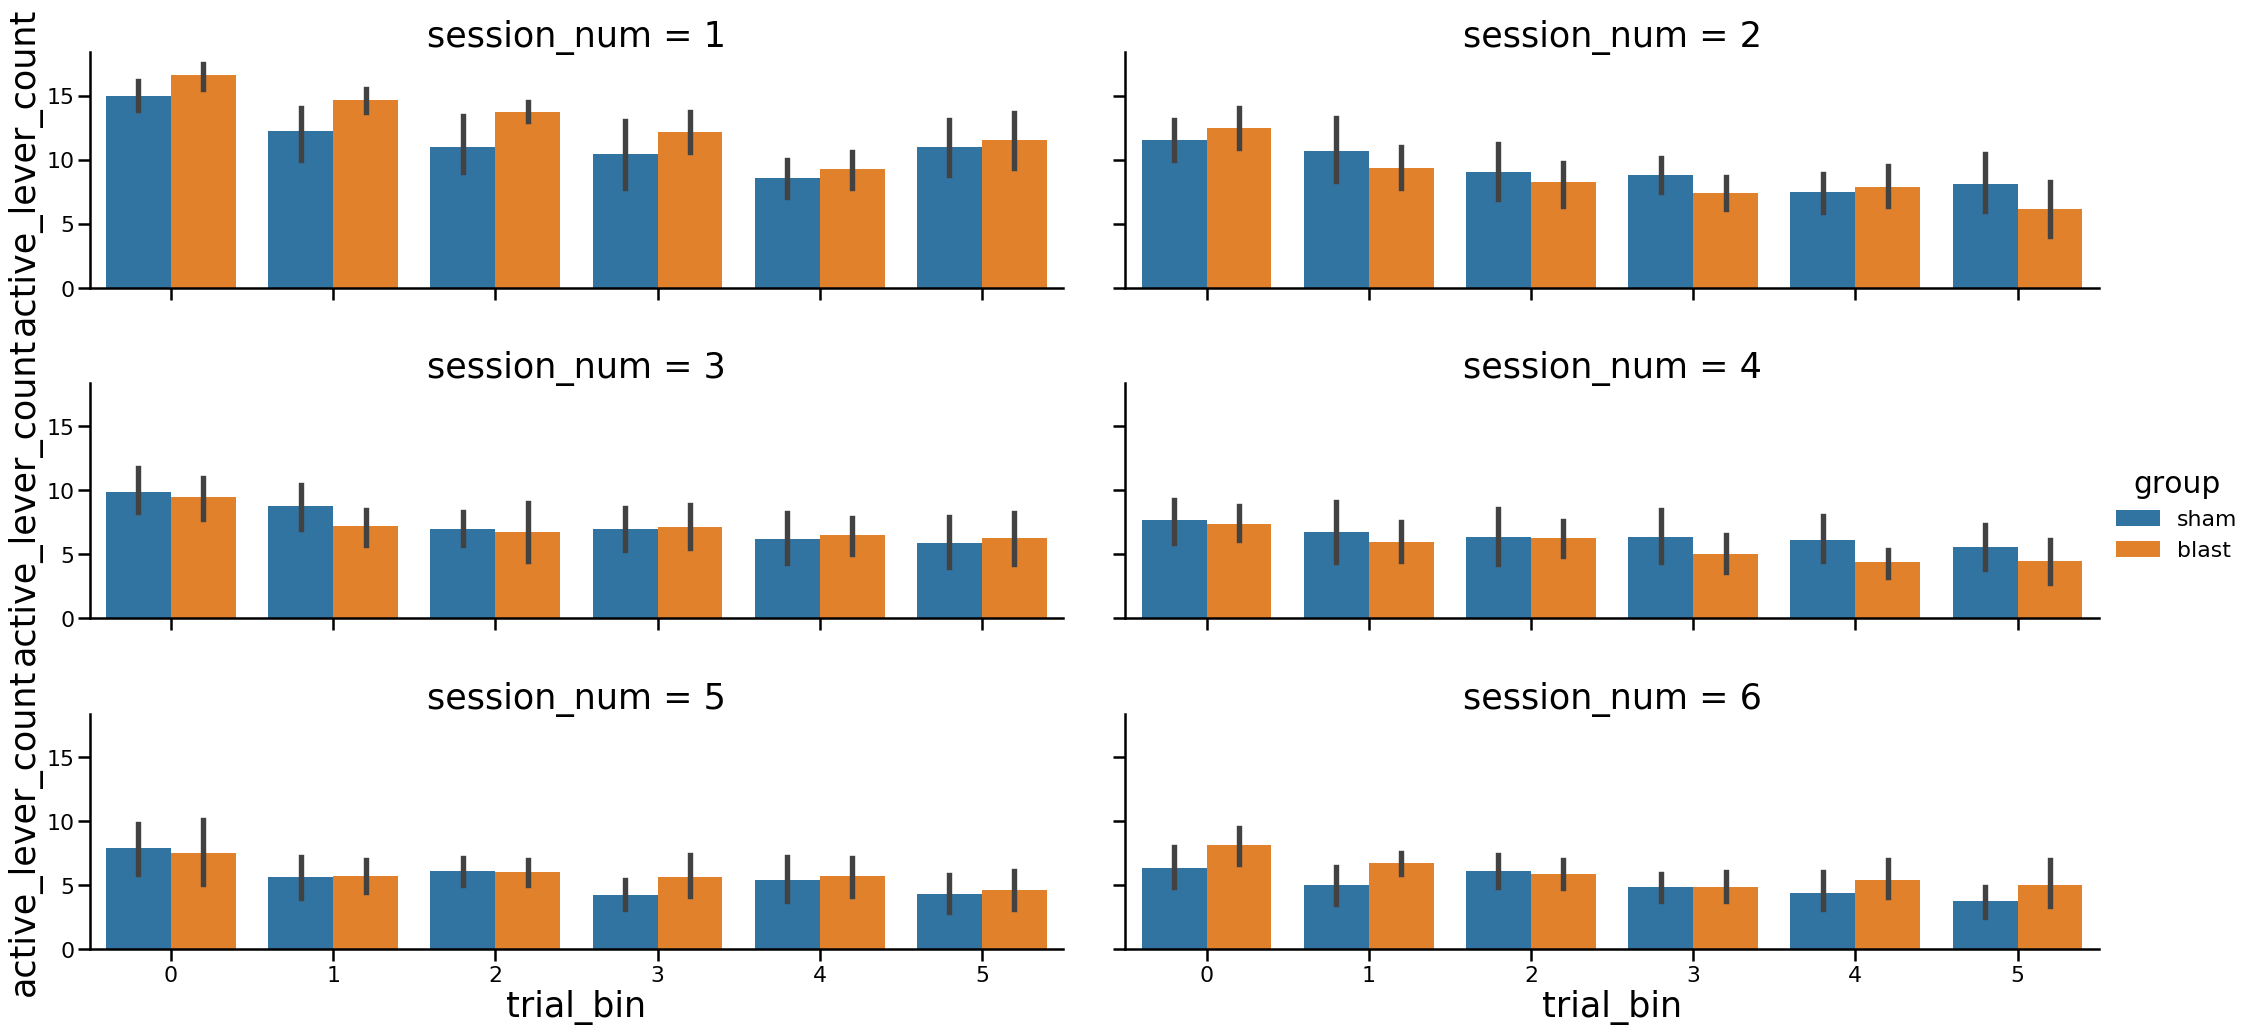

In [254]:
sns.catplot(x='trial_bin', y='active_lever_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3)

plt.show()

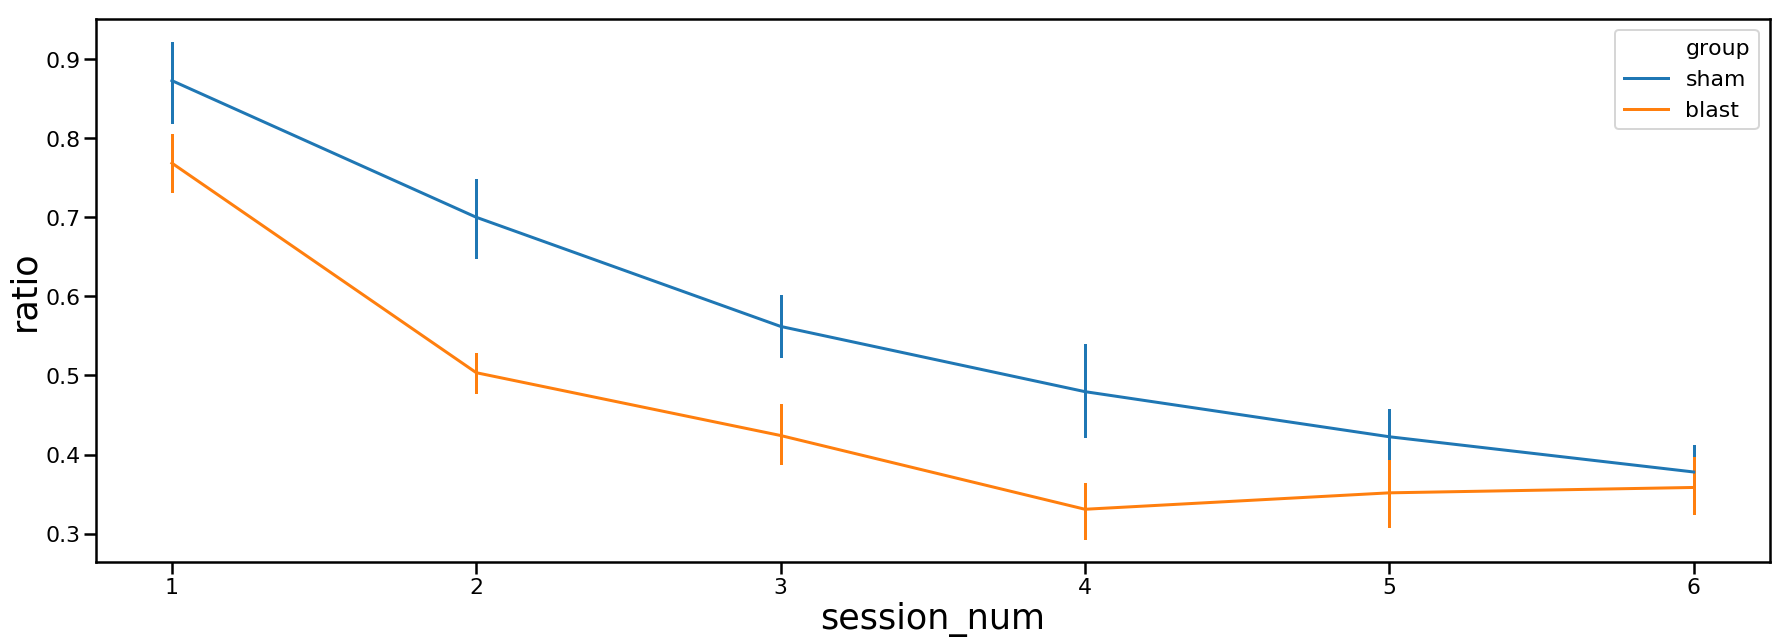

In [231]:
df_active = data_session.groupby(['session_num', 'animal_number', 'group'])[['active_lever_count']].sum().reset_index()

df_active['ratio'] = df_active.apply(lambda row: row['active_lever_count']/rev_4_active[rev_4_active['animal_number'] == row['animal_number']]['active_lever_count'].values[0], axis=1)

plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='ratio', data=df_active, hue='group', err_style='bars', ci=68)

plt.show()

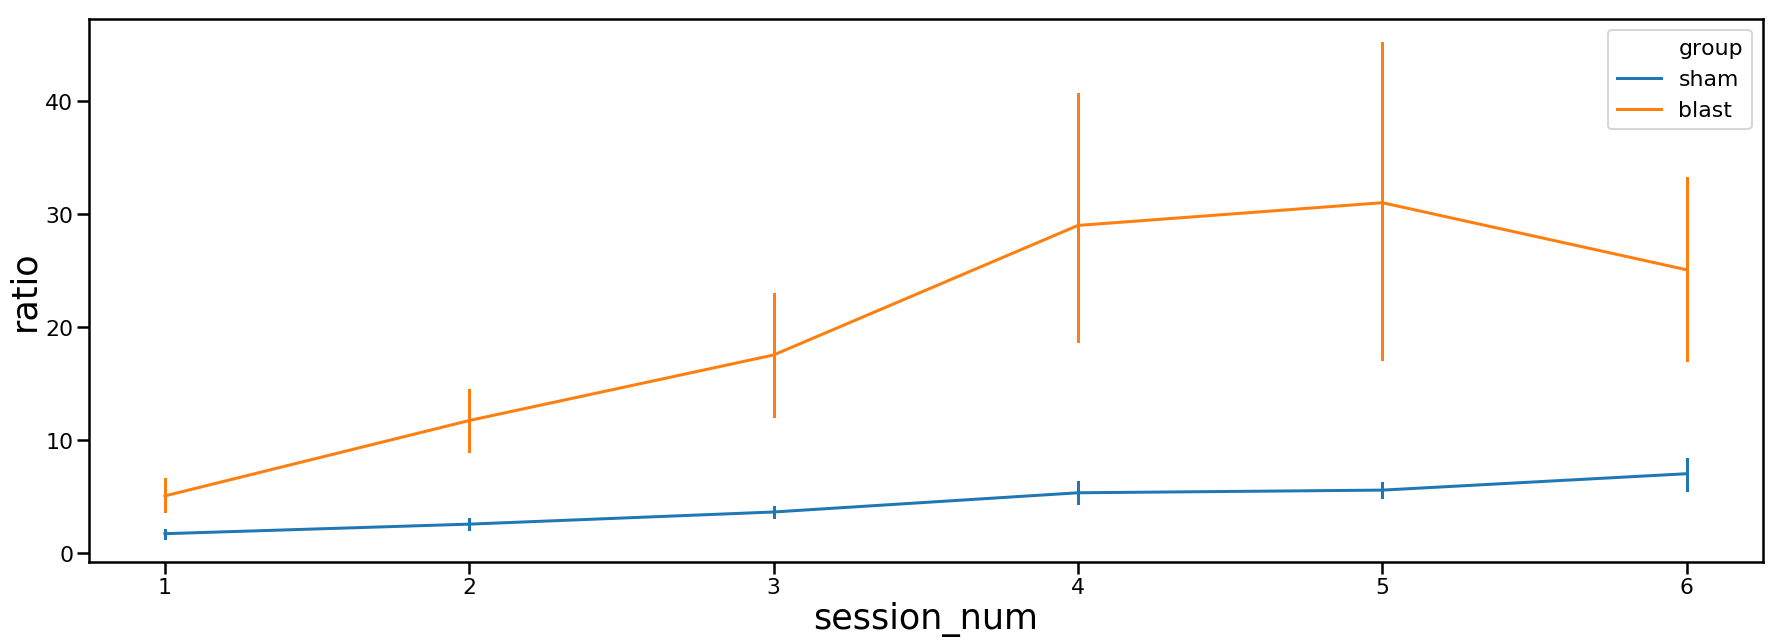

In [232]:
df_time = data_session.groupby(['session_num', 'animal_number', 'group'])[['trial_duration']].mean().reset_index()

df_time['ratio'] = df_time.apply(lambda row: row['trial_duration']/rev_4_time[rev_4_time['animal_number'] == row['animal_number']]['trial_duration'].values[0], axis=1)

plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='ratio', data=df_time, hue='group', err_style='bars', ci=68)

plt.show()

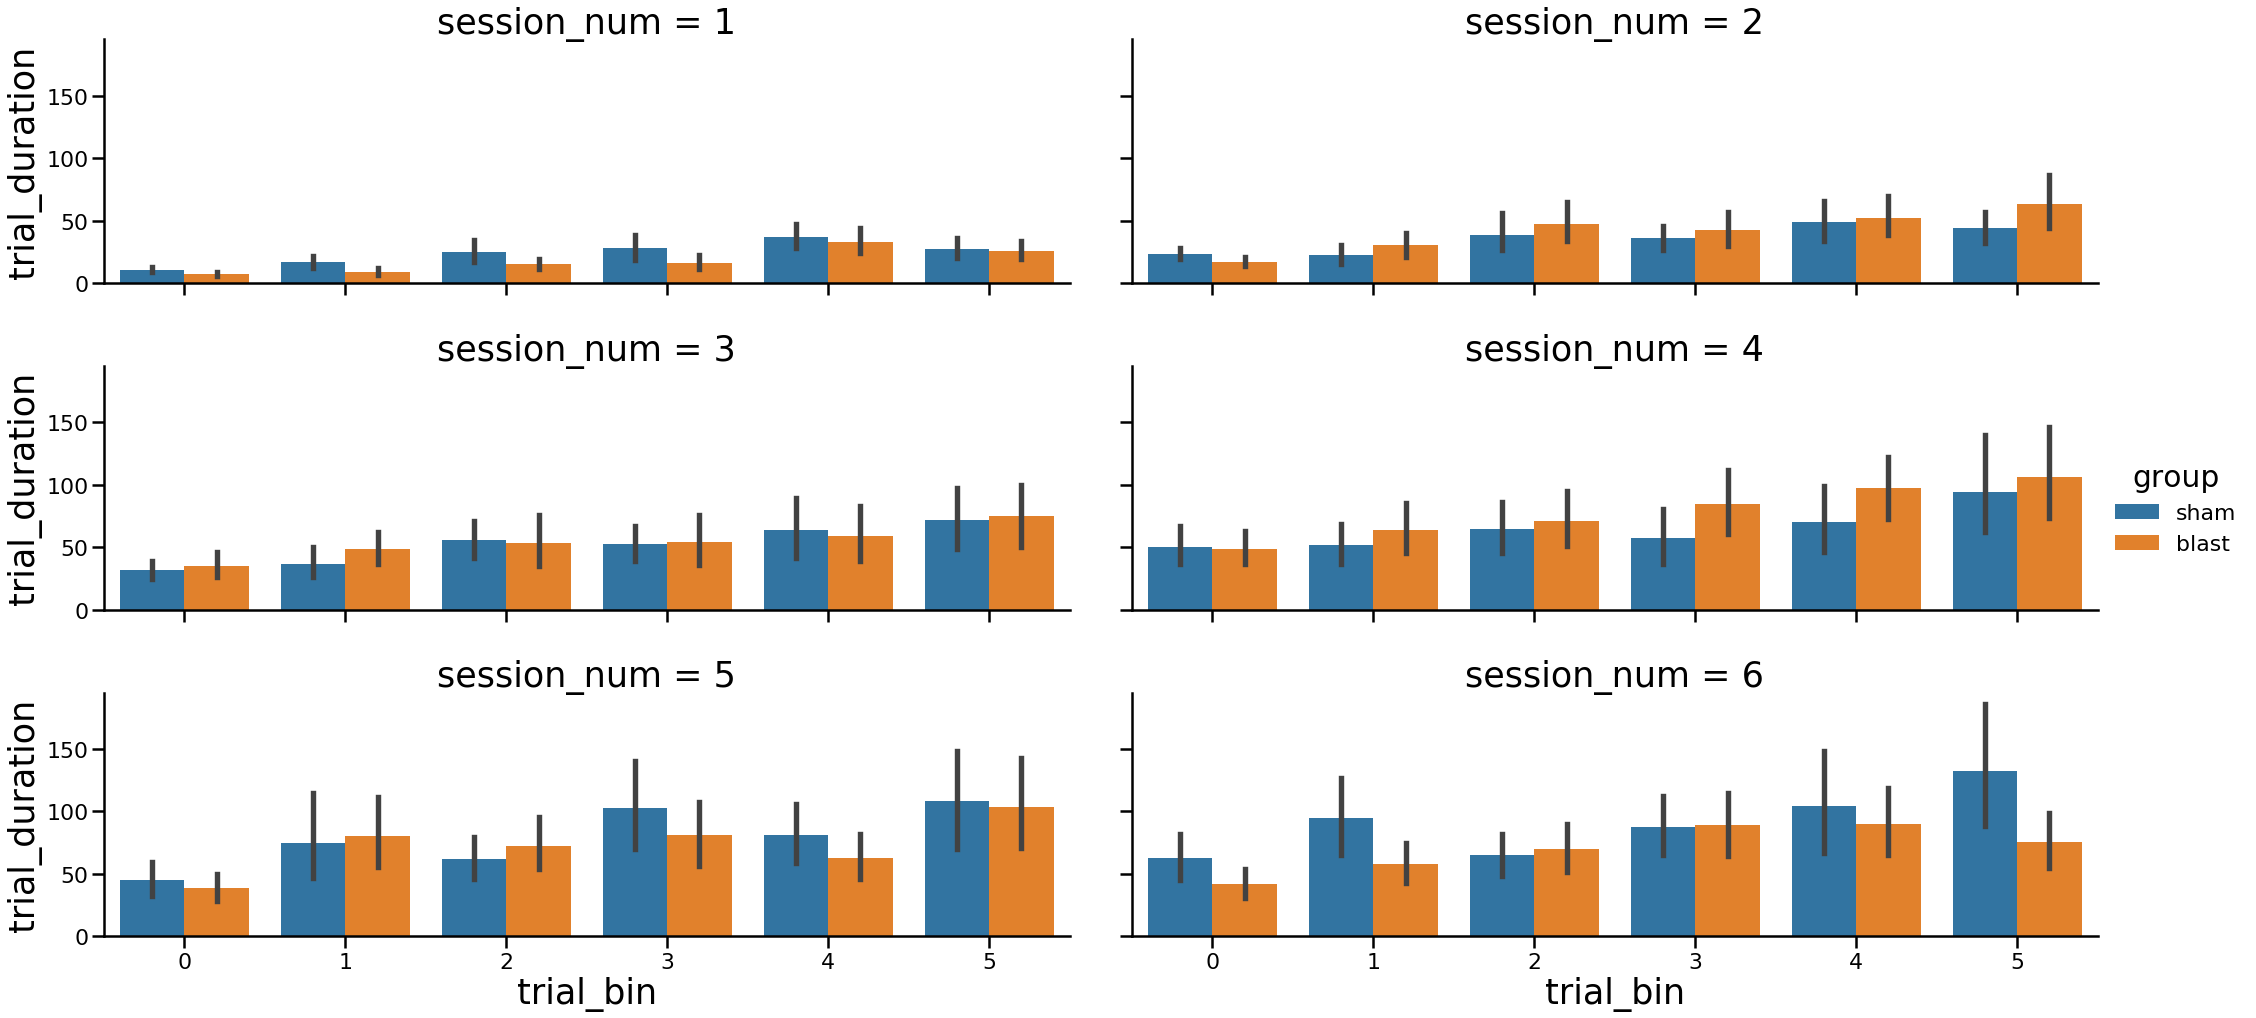

In [233]:
sns.catplot(x='trial_bin', y='trial_duration', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3)

plt.show()

In [239]:
#get info for final extinction learning session
ext_6_active = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['animal_number', 'group'])[['active_lever_count']].sum().reset_index()
ext_6_time = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['animal_number', 'group'])[['trial_duration']].mean().reset_index()

ext_6_active_bins = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['trial_bin', 'animal_number', 'group'])[['active_lever_count']].sum().reset_index()
ext_6_time_bins = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['trial_bin', 'animal_number', 'group'])[['trial_duration']].mean().reset_index()

### Cue inducted reinstatement

In [255]:
data = all_data[all_data['stage'] == 'reinst_cue']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200322,reinst_cue,session,RCP,1,158,825,sham,0,0,0,9.36,1.0,0,NaN,0,NaN,NaN,1,9.35,0,NaN,9.35,NaN,NaN


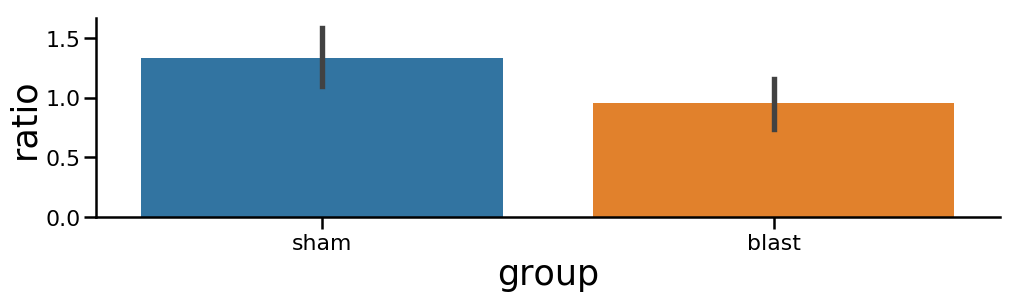

In [247]:
df_active = data_session.groupby(['animal_number', 'group'])[['active_lever_count']].sum().reset_index()

df_active['ratio'] = df_active.apply(lambda row: row['active_lever_count']/ext_6_active[ext_6_active['animal_number'] == row['animal_number']]['active_lever_count'].values[0], axis=1)

sns.catplot(x='group', y='ratio', data=df_active, kind='bar', height=5, aspect=3)

plt.show()

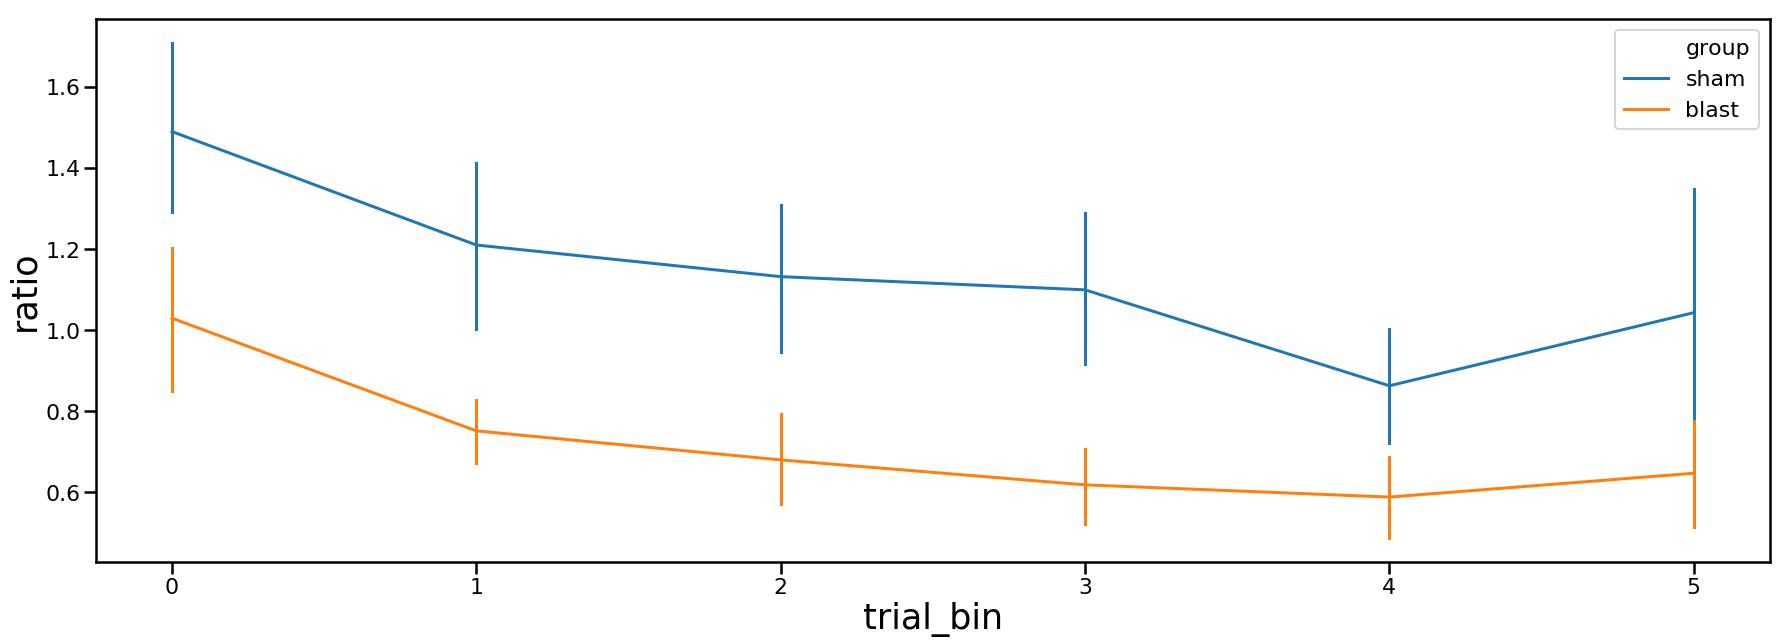

In [251]:
df_active_bins = data_session.groupby(['trial_bin', 'animal_number', 'group'])[['active_lever_count']].sum().reset_index()

df_active_bins['ratio'] = df_active_bins.apply(lambda row: row['active_lever_count']/ext_6_active_bins[ext_6_active_bins['animal_number'] == row['animal_number']]['active_lever_count'].values[0], axis=1)

plt.figure(figsize=(30,10))
sns.lineplot(x='trial_bin', y='ratio', data=df_active_bins, hue='group', err_style='bars', ci=68)

plt.show()

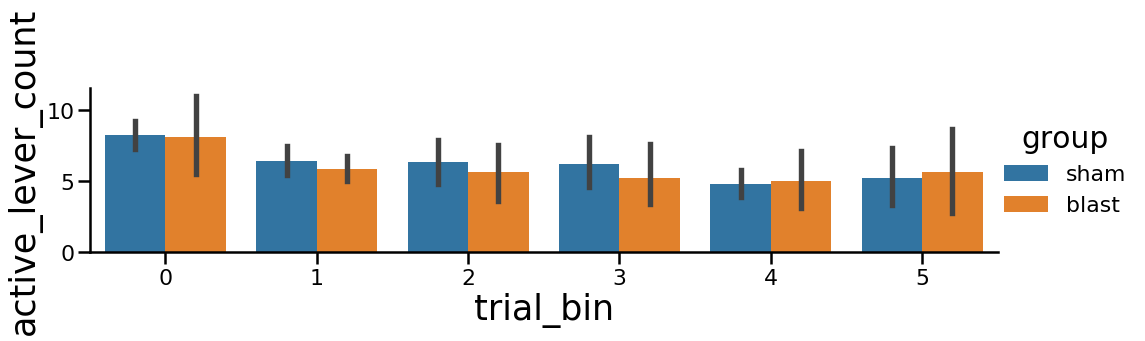

In [257]:
sns.catplot(x='trial_bin', y='active_lever_count', data=data_session.groupby(['trial_bin', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', kind='bar', height=5, aspect=3)

plt.show()

In [222]:
data_session = all_data[all_data['type'] == 'session']
data_ITI = all_data[all_data['type'] == 'ITI']
data_session.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200316,extinction_learn,session,EXT,1,158,825,sham,0,0,0,3.68,1.0,0,NaN,0,NaN,NaN,1,3.67,0,NaN,3.67,NaN,NaN


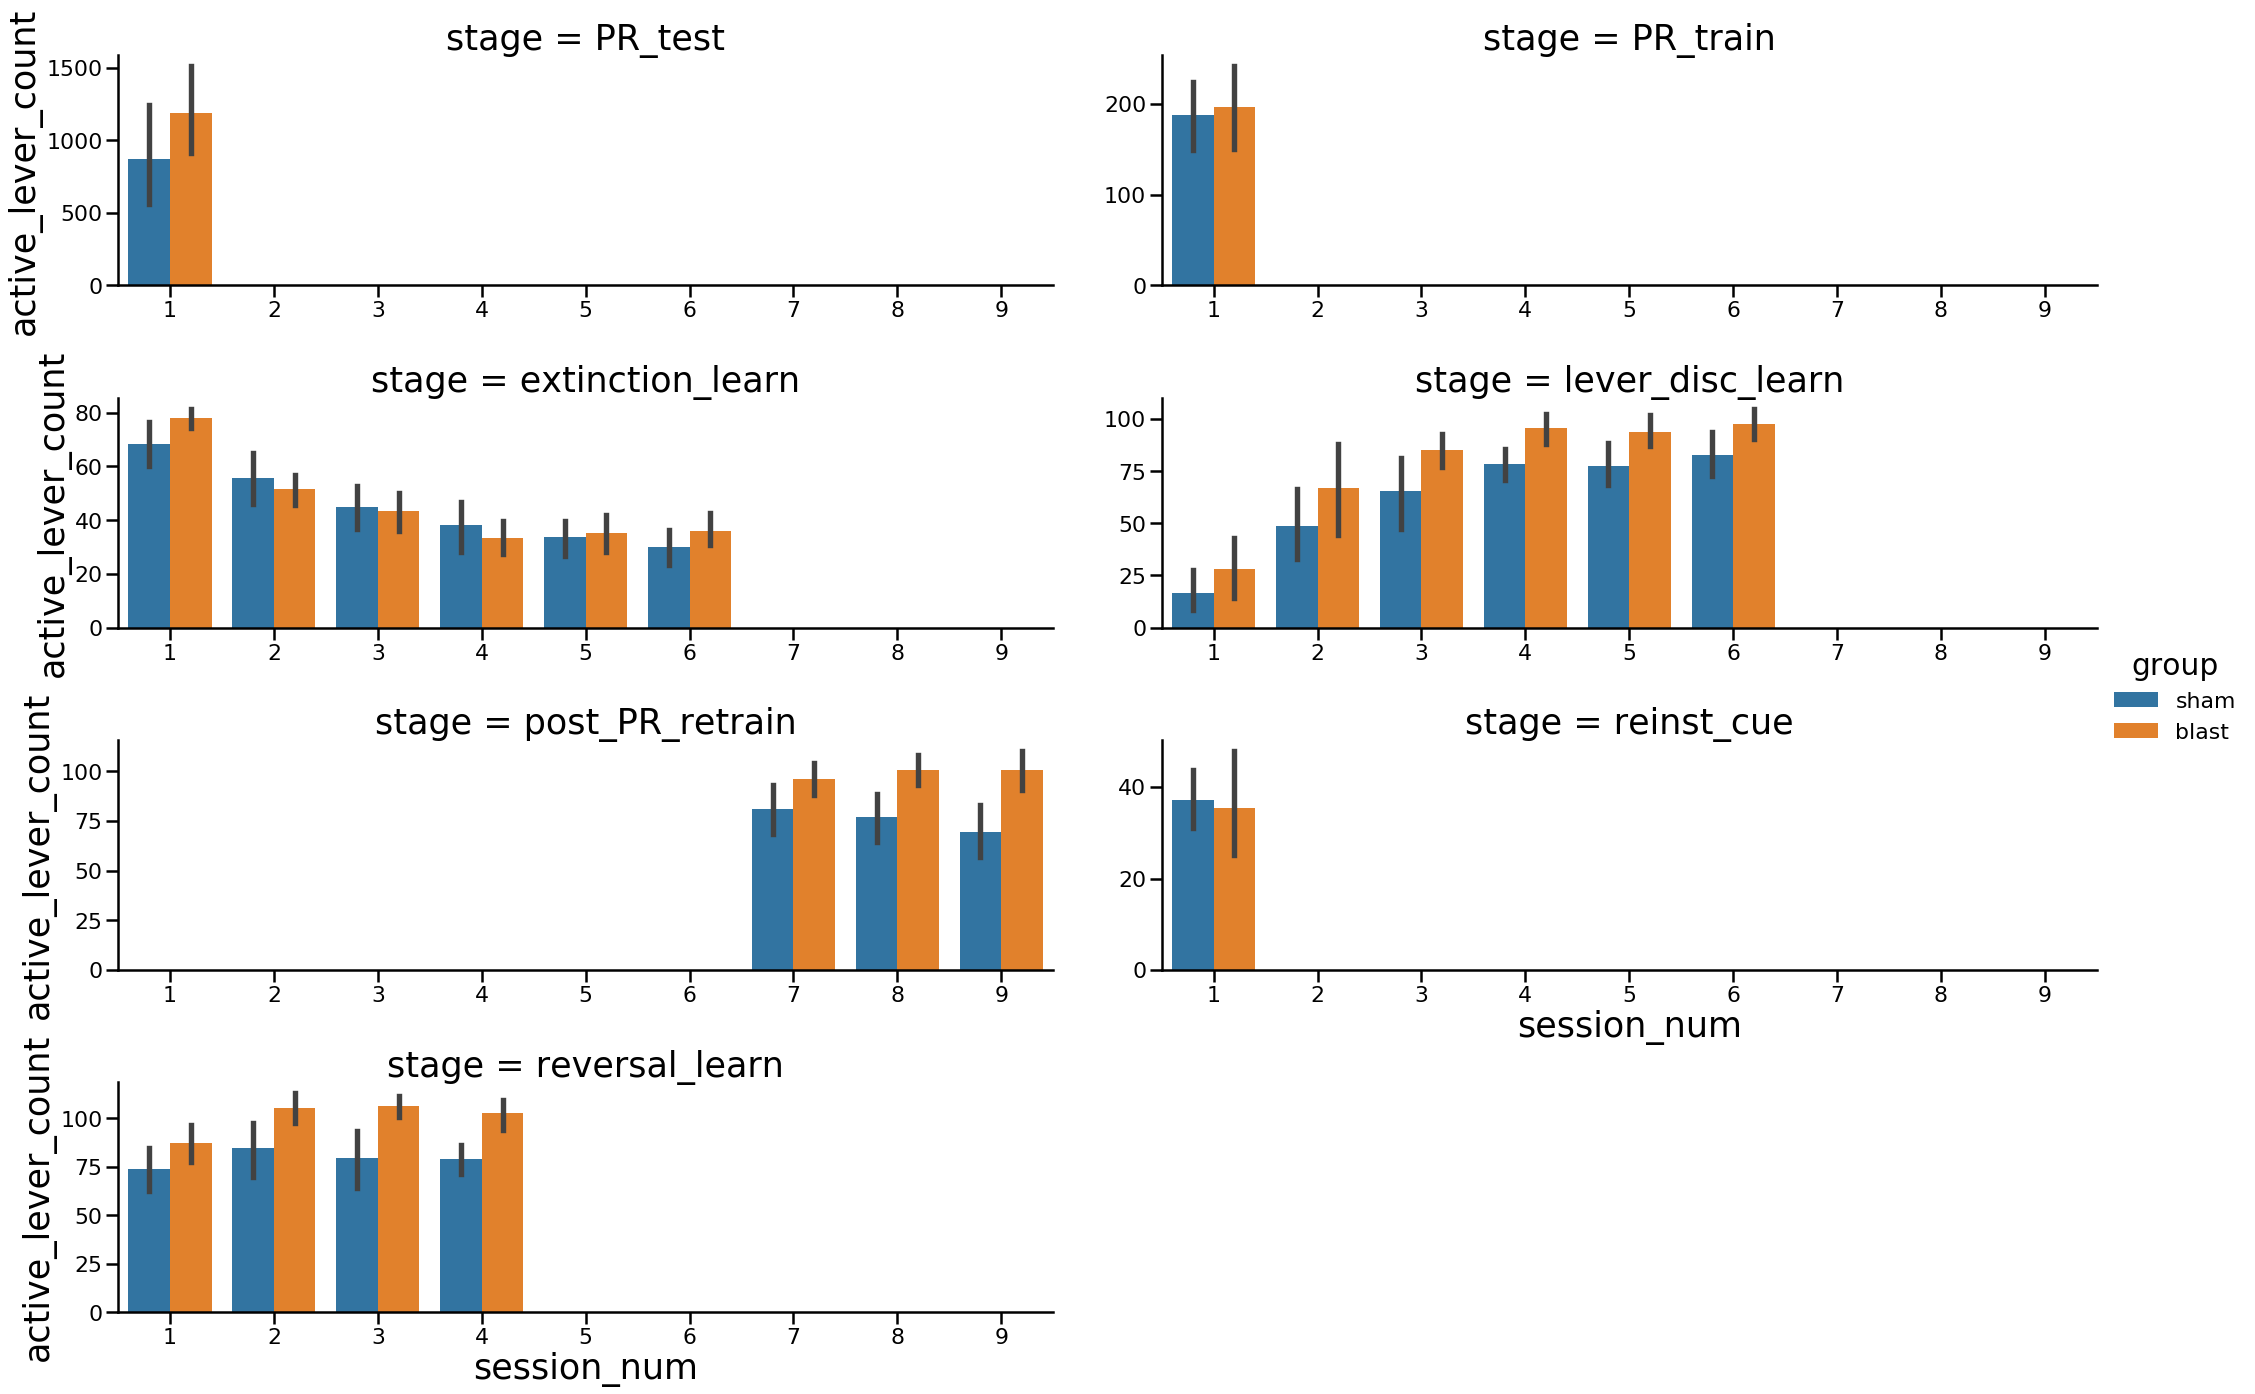

In [229]:
sns.catplot(x='session_num', y='active_lever_count', data=data_session.groupby(['stage', 'session', 'session_num', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', col='stage', col_wrap=2, kind='bar', height=5, aspect=3, sharex=False, sharey=False)

plt.show()

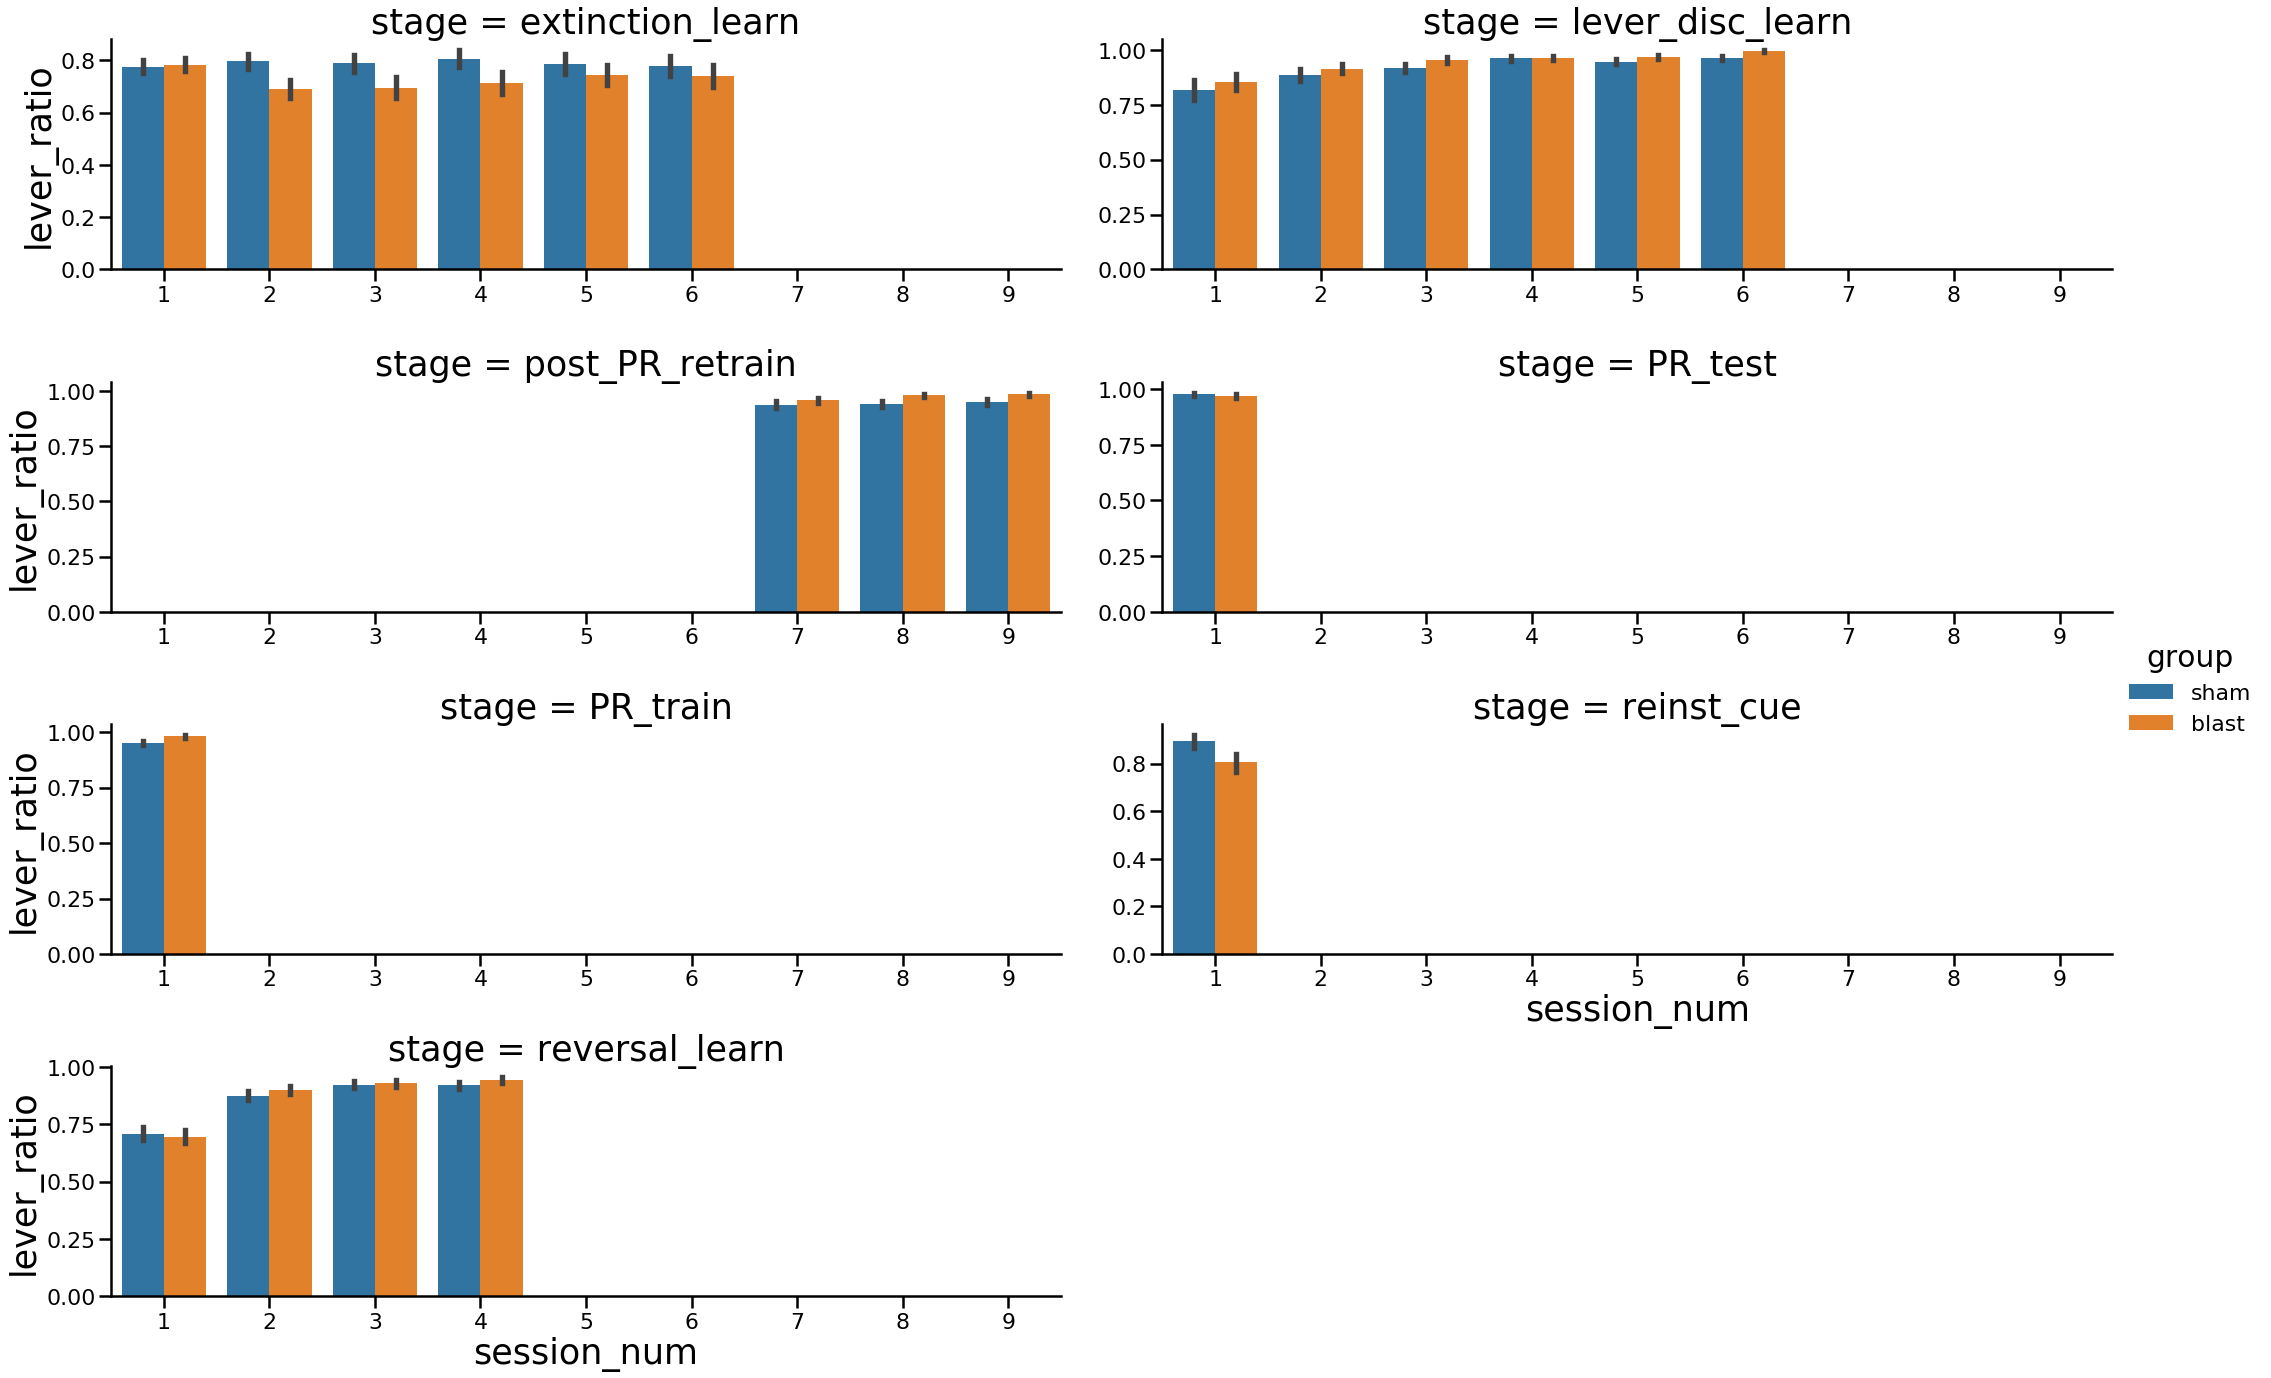

In [228]:
sns.catplot(x='session_num', y='lever_ratio', data=data_session, hue='group', col='stage', col_wrap=2, kind='bar', height=5, aspect=3, sharex=False, sharey=False)

plt.show()